## 주차수요 예측 AI 경진대회

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#폰트 설정          
from matplotlib import rc    
import matplotlib as mpl
import matplotlib.font_manager as fm

fpath = 'C:/Users/eunse/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=fpath)
font_name = font_prop.get_name()
mpl.rc('font',family=font_name)

# %matplotlib inline          
rc('font', family='NanumGothic' )
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
#데이터 불러오기
#dir='F:/01_WORK/98_STUDY/kaggle/parkingdemand/new_parking/data/dacon_data/'
train= pd.read_csv('../data/dacon_data/train.csv') 
test= pd.read_csv('../data/dacon_data/test.csv') 
age_gender_info=pd.read_csv('../data/dacon_data/age_gender_info.csv')
sample_submission=pd.read_csv('../data/dacon_data/sample_submission.csv')

In [3]:
print('train.shape: ', train.shape) 
print('test.shape: ', test.shape)     
print('age_gender_info.shape: ', age_gender_info.shape) 

train.shape:  (2952, 15)
test.shape:  (1022, 14)
age_gender_info.shape:  (16, 23)


In [4]:
train.head() 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [5]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [6]:
age_gender_info.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [7]:
sample_submission.head()

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0


#### 변수 설명
- 자격 유형: 입주민의 입주자격의 유형(비식별화)
- 공가수: 비어있는 집
- 전용면적별 세대수: 임대 아파트 대상만 집계
- 전체 세대수 : '분양'아파트가 포함된 수치
- 전용 면적 : 단순 면적이 아닌 별도의 비공개 기준

In [8]:
#결측치 확인  
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [9]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

#### 추측 1: 임대보증금 - 임대료 상관관계 높아보임

### EDA 
- 단변수 분석
- 다변수 분석 (등록차량수)
- 상관분석 

In [10]:
train=train.rename({'도보 10분거리 내 지하철역 수(환승노선 수 반영)': '지하철', '도보 10분거리 내 버스정류장 수': '버스'},axis=1)
test=test.rename({'도보 10분거리 내 지하철역 수(환승노선 수 반영)': '지하철', '도보 10분거리 내 버스정류장 수': '버스'},axis=1)

In [11]:
train.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2952 non-null   object 
 1   총세대수      2952 non-null   int64  
 2   임대건물구분    2952 non-null   object 
 3   지역        2952 non-null   object 
 4   공급유형      2952 non-null   object 
 5   전용면적      2952 non-null   float64
 6   전용면적별세대수  2952 non-null   int64  
 7   공가수       2952 non-null   float64
 8   자격유형      2952 non-null   object 
 9   임대보증금     2383 non-null   object 
 10  임대료       2383 non-null   object 
 11  지하철       2741 non-null   float64
 12  버스        2948 non-null   float64
 13  단지내주차면수   2952 non-null   float64
 14  등록차량수     2952 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 346.1+ KB


In [12]:
train.describe().T  

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
지하철,2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
버스,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


In [13]:
test.describe().T  

,count,mean,std,min,25%,50%,75%,max
총세대수,1022.0,862.080235,536.340894,75.00,488.000,745.00,1161.0,2572.0
전용면적,1022.0,43.706311,35.890759,9.96,33.135,39.72,47.4,583.4
전용면적별세대수,1022.0,100.414873,125.997855,1.00,14.000,60.00,140.0,1341.0
공가수,1022.0,15.544031,11.070140,0.00,6.000,15.00,23.0,45.0
지하철,980.0,0.136735,0.435500,0.00,0.000,0.00,0.0,2.0
버스,1022.0,4.626223,5.414568,1.00,2.000,3.00,5.0,50.0
단지내주차면수,1022.0,548.771037,342.636703,29.00,286.000,458.00,711.0,1696.0


In [14]:
age_gender_info=age_gender_info.set_index('지역')

In [15]:
#인구 분포 파악 (평균)     
age_gender_info.loc['전체 분포 평균']=age_gender_info.mean()        
age_gender_info.loc['광역시 평균']=age_gender_info[age_gender_info.index.str.contains('시')].mean()
age_gender_info.loc['도 평균']=age_gender_info[age_gender_info.index.str.contains('도')].mean()

In [16]:
age_gender_info 

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
지역,,,,,,,,,,,,,,,,,,,,,
경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,...,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,...,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,...,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028


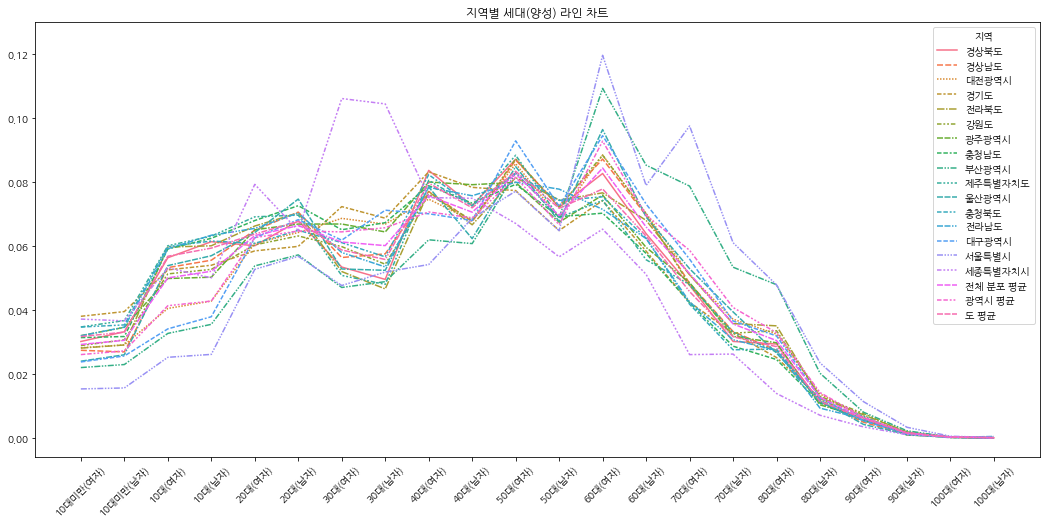

In [17]:
#세대 파악  
fig = plt.figure(figsize = (18, 8))  
sns.lineplot(data=age_gender_info.T) 
plt.title('지역별 세대(양성) 라인 차트')
plt.xticks(rotation=45)  
plt.ylim(top=0.13) 
plt.show() 

1. 대체로 남성보다 여성의 비율이 더 높다. 
2. 세종특별시 - 30대 비율 높다.
3. 서울특별시, 부산 광역시 - 60, 70대 여성 비율 높다.
4. 정규 분포의 형태


In [18]:
age_gender_info[age_gender_info.columns[age_gender_info.columns.str.contains('여자')]]  

,10대미만(여자),10대(여자),20대(여자),30대(여자),40대(여자),50대(여자),60대(여자),70대(여자),80대(여자),90대(여자),100대(여자)
지역,,,,,,,,,,,
경상북도,0.030158,0.056346,0.060096,0.053433,0.083660,0.087149,0.082684,0.047717,0.029361,0.005578,0.000234
경상남도,0.027400,0.053257,0.064920,0.056414,0.077092,0.086873,0.087201,0.048357,0.027361,0.004910,0.000179
대전광역시,0.028197,0.040490,0.060834,0.068654,0.074667,0.085751,0.088468,0.051010,0.032455,0.006494,0.000298
경기도,0.038030,0.052546,0.058484,0.072331,0.083208,0.077345,0.074237,0.042422,0.025136,0.005390,0.000290
전라북도,0.028089,0.059685,0.066262,0.052027,0.077005,0.081408,0.076636,0.051025,0.035049,0.007223,0.000158
강원도,0.028888,0.051287,0.060374,0.059821,0.076201,0.087266,0.088423,0.047732,0.033515,0.007628,0.000319
광주광역시,0.031994,0.049851,0.065084,0.066888,0.080028,0.079902,0.075930,0.048552,0.029749,0.006343,0.000353
충청남도,0.031369,0.059077,0.067975,0.065095,0.078860,0.079299,0.070278,0.042296,0.024514,0.005429,0.000219
부산광역시,0.022003,0.032681,0.053796,0.047049,0.061952,0.082899,0.109297,0.078743,0.047908,0.008043,0.000268


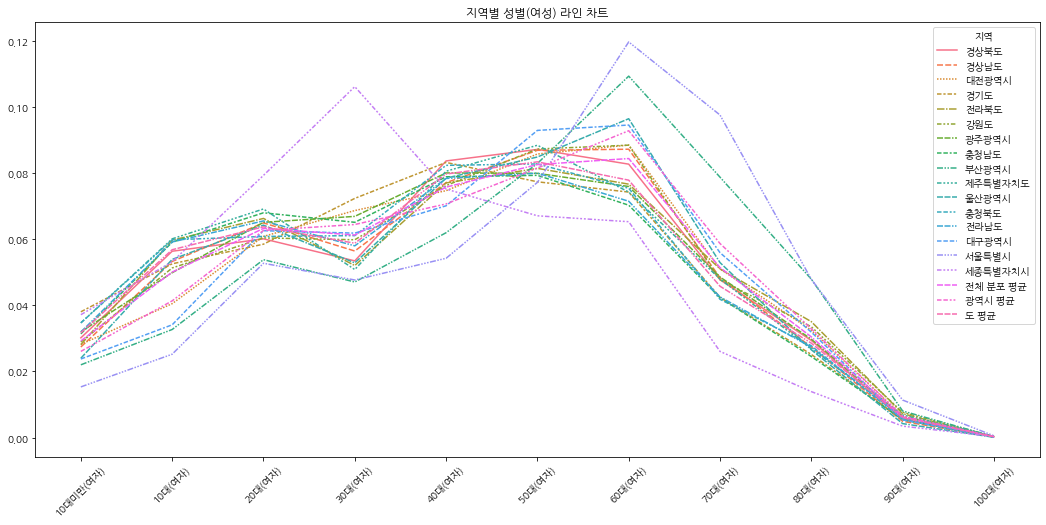

In [19]:
#성별 파악  
fig = plt.figure(figsize = (18, 8))  
sns.lineplot(data=age_gender_info[age_gender_info.columns[age_gender_info.columns.str.contains('여자')]].T)  
plt.title('지역별 성별(여성) 라인 차트')
plt.xticks(rotation=45)  
plt.show() 

1. 60대 여성까지 전체적으로 나이가 많아질수록 비율이 높아진다. 
2. 정규 분포의 형태

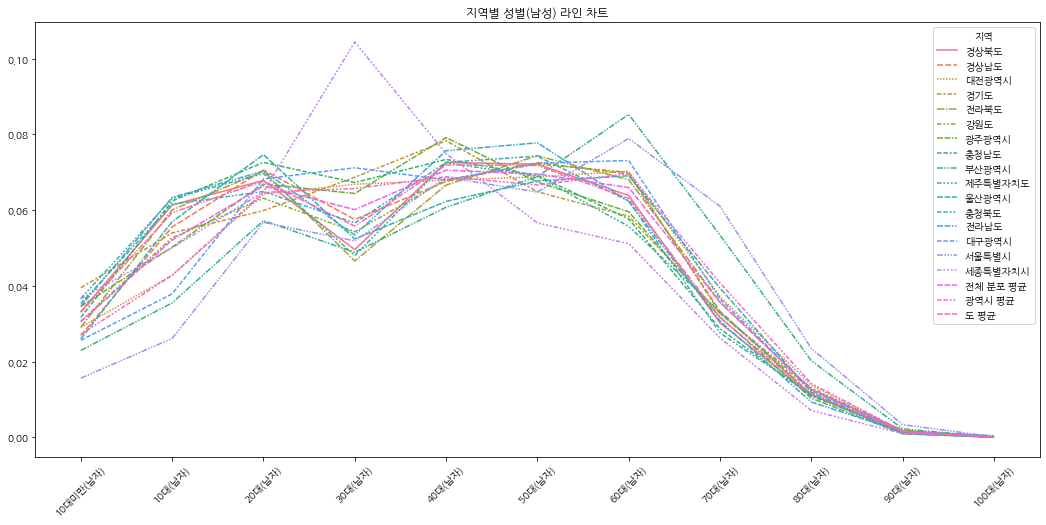

In [20]:
#성별 파악  
fig = plt.figure(figsize = (18, 8))  
sns.lineplot(data=age_gender_info[age_gender_info.columns[age_gender_info.columns.str.contains('남자')]].T)  
plt.title('지역별 성별(남성) 라인 차트')  
plt.xticks(rotation=45)  
plt.show() 

1. 60대부터 비율이 낮아진다. 
2. 20대, 40대보다 30대 남자의 비율이 낮다. 
3. 정규 분포의 형태

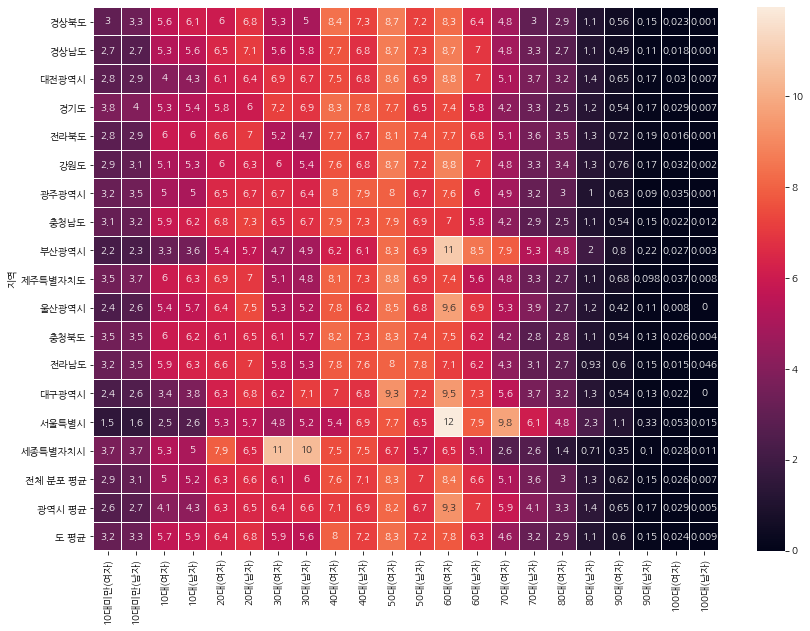

In [21]:
#히트맵
plt.figure(figsize=(14, 10))
sns.heatmap((age_gender_info*100).round(3),annot=True, linewidths=0.01)
plt.show() 

1. 세종특별시 - 30대 비율 높다. 
2. 부산광역시 - 60대 비율 높다. 
3. 서울특별시 - 60대 비율 높다. 

In [22]:
len(train.dtypes[train.dtypes!='object'].index.tolist())     

8

In [23]:
def float_plot(columns, df): #연속형 단변수 
    fig =plt.figure(figsize=(20,30))
    for i, col in enumerate(columns): 
        plt.subplot(5,2,i+1)            
        sns.distplot(df[col])   

def cate_plot(columns,df): #범주형 단변수
    fig =plt.figure(figsize=(20,35))      
    for i, col in enumerate(columns): 
        plt.subplot(5, 2, i+1) 
        chart=sns.countplot(x=col,data=df) 
        chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

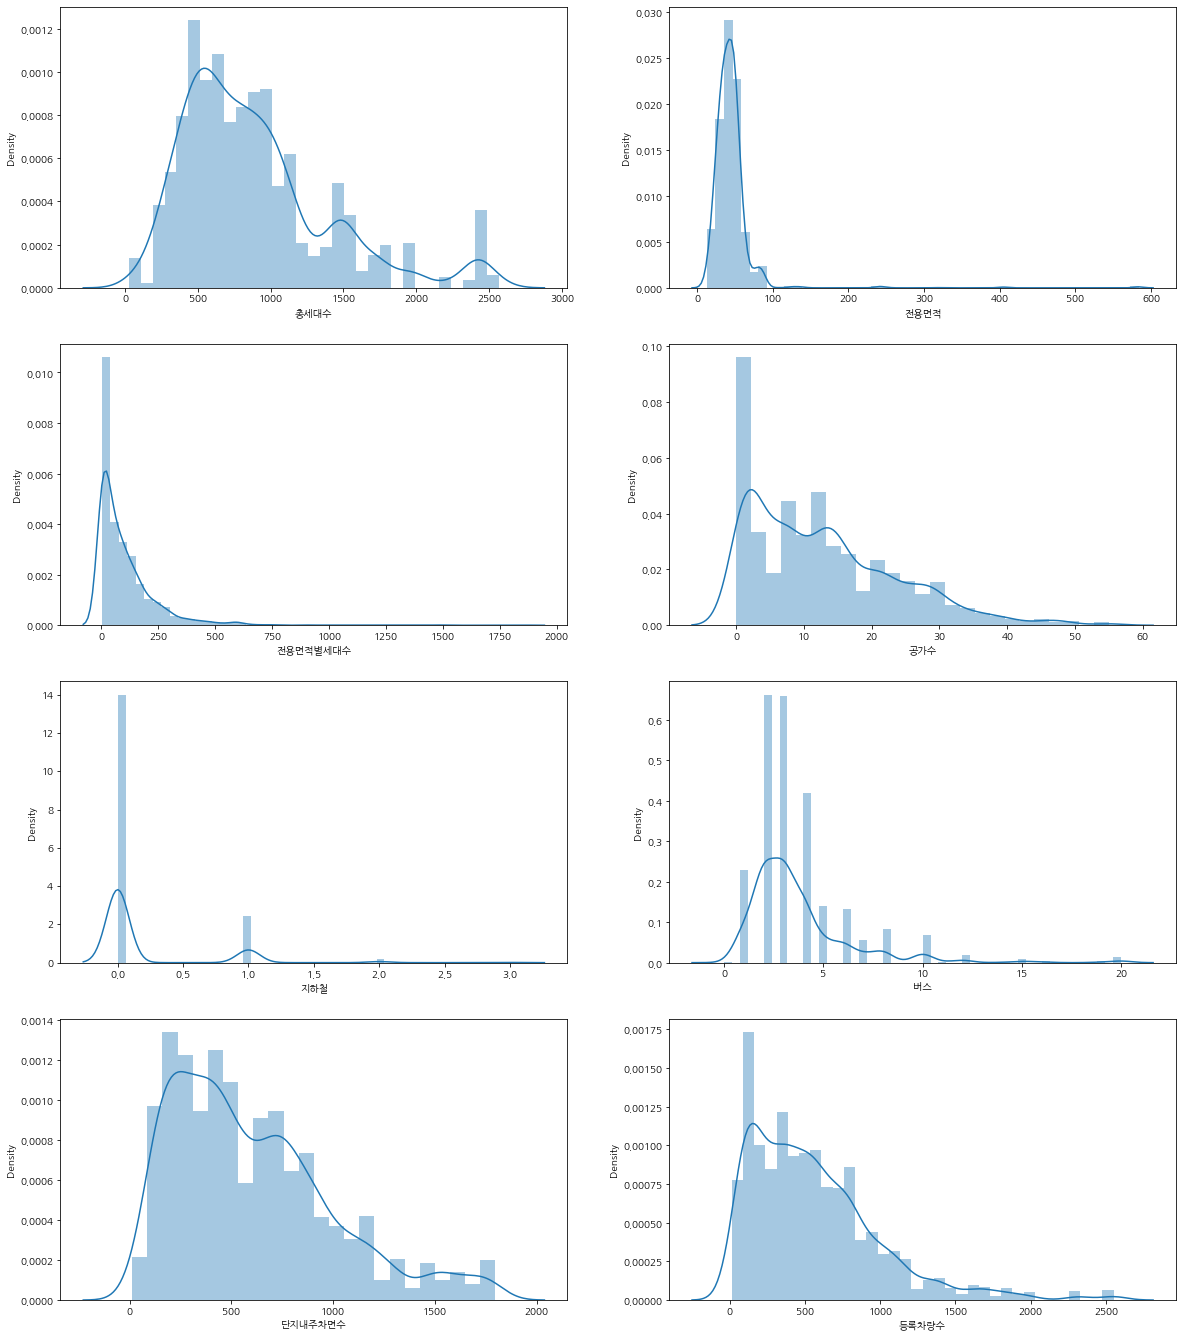

In [24]:
float_plot(train.dtypes[train.dtypes!='object'].index.tolist(), train)  

- 세대수가 많은 대단지 존재
- 로그화 필요

In [25]:
#총세대수가 가장 많은,적은 단지코드 
print(train.loc[train['단지코드'].drop_duplicates().index][['단지코드','총세대수','지역','공급유형','전용면적']].nlargest(3,'총세대수'))
print(train.loc[train['단지코드'].drop_duplicates().index][['단지코드','총세대수','지역','공급유형','전용면적']].nsmallest(3,'총세대수')) 

       단지코드  총세대수     지역  공급유형   전용면적
2511  C1363  2568    경기도  국민임대  26.85
522   C2132  2428  부산광역시  영구임대  26.37
261   C1859  2424  대전광역시  영구임대  26.37
       단지코드  총세대수     지역  공급유형   전용면적
2821  C2059    26    경기도  행복주택  16.34
2942  C2020    40  부산광역시  행복주택  16.80
2200  C2237    70   충청남도  국민임대  36.78


In [26]:
#단지코드별 총세대수 = 전용면적별세대수
code_total=pd.DataFrame(train.groupby(['단지코드','총세대수'])['전용면적별세대수'].sum()).reset_index()  
code_total

,단지코드,총세대수,전용면적별세대수
0,C1000,566,566
1,C1004,521,521
2,C1005,1144,1144
3,C1013,1308,1308
4,C1014,996,996
...,...,...,...
418,C2663,772,772
419,C2666,1084,1084
420,C2670,648,648
421,C2680,758,758


In [27]:
code_total[code_total['총세대수']!=code_total['전용면적별세대수']]

,단지코드,총세대수,전용면적별세대수
8,C1024,680,477
22,C1068,806,805
39,C1156,1004,998
49,C1206,755,488
53,C1218,1048,1040
69,C1312,518,517
80,C1344,424,300
96,C1424,625,624
109,C1490,749,655
123,C1584,1227,1220


- 분양 아파트 세대수 컬럼 필요 (if 총세대수 != 전용면적별세대수)
- 실 세대수 칼럼 필요 (전용면적별세대수 sum - 공가수)

In [28]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스', '단지내주차면수', '등록차량수'],
      dtype='object')

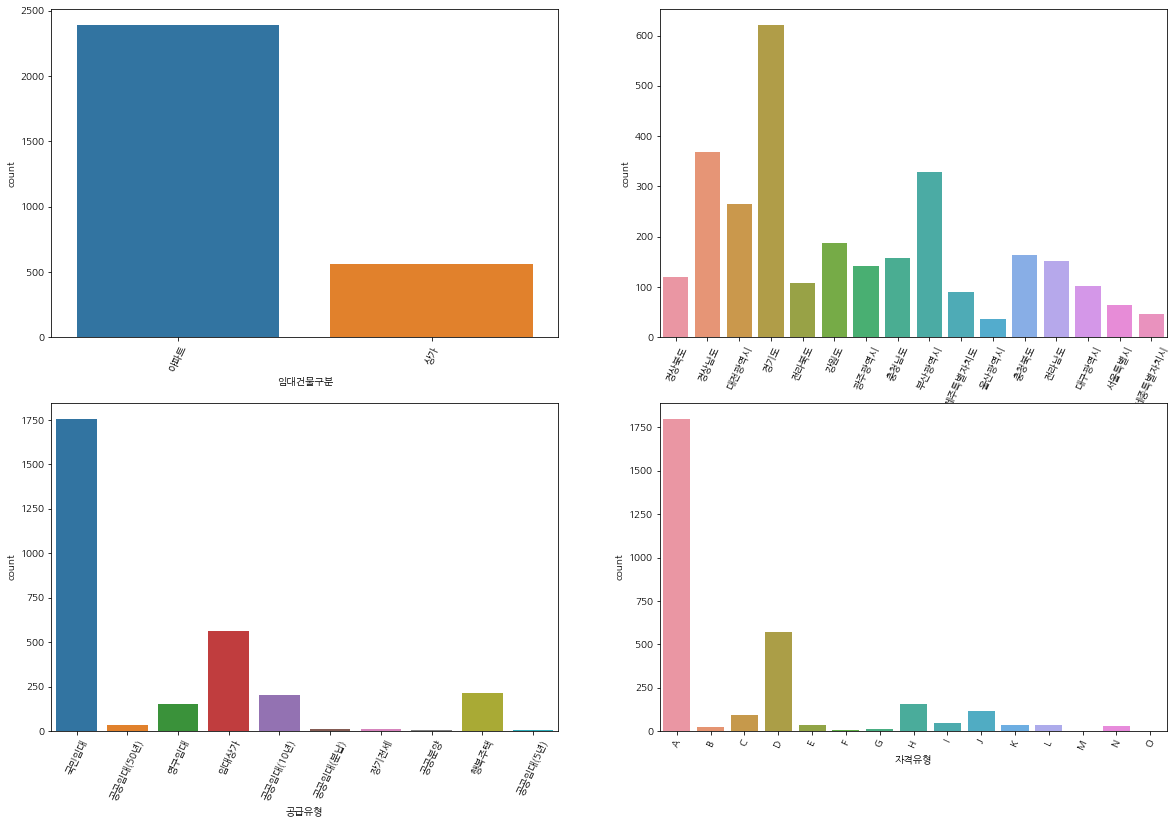

In [29]:
cate_plot(['임대건물구분','지역','공급유형','자격유형'], train)         

In [30]:
train[['임대료','임대보증금']].value_counts()

임대료     임대보증금   
79980   5787000     18
-       -           12
94990   6873000     12
257660  34810000    12
100920  14418000    12
                    ..
261410  21096000     1
261760  29086000     1
261820  23512000     1
107550  11661000     1
119000  27640000     1
Length: 1154, dtype: int64

In [31]:
#임대료, 임대보증금 null 처리
train.loc[train['임대료']=='-', '임대료'] = np.nan  
train.loc[train['임대보증금']=='-', '임대보증금'] = np.nan  

In [32]:
train[['임대보증금','임대료']]=train[['임대보증금','임대료']].astype(np.float64)  

평균 임대료 195718.08 원
평균 임대보증금 26864318.09 원


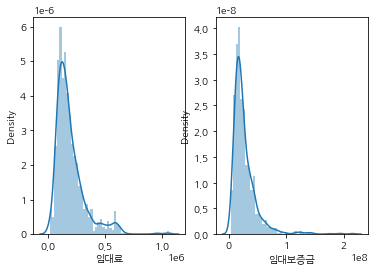

<Figure size 1080x720 with 0 Axes>

In [33]:
fig,ax=plt.subplots(1,2)    
plt.figure(figsize=(15,10))      
sns.distplot(train['임대료'], ax=ax[0]) 
sns.distplot(train['임대보증금'] ,ax=ax[1]) 
print('평균 임대료',np.round(train['임대료'].mean(),2), '원')          
print('평균 임대보증금',np.round(train['임대보증금'].mean(),2), '원')   

- 임대료 대부분이 40만원 이하, 평균 대략 20만원
- 임대보증금 대부분 5천만원 이하, 평균 2천 6백만원

## 2. 다변수 분석 - 종속변수와의 관계

In [34]:
train.dtypes[train.dtypes=='object']

단지코드      object
임대건물구분    object
지역        object
공급유형      object
자격유형      object
dtype: object

In [35]:
train[train['임대건물구분']=='아파트']['등록차량수'].describe()

count    2390.000000
mean      654.150209
std       427.310315
min        13.000000
25%       358.000000
50%       568.000000
75%       831.000000
max      2550.000000
Name: 등록차량수, dtype: float64

In [36]:
train  

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [37]:
def boxplot(df, col, y_col):
    fig = plt.figure(figsize=(20,50))
    for i, column in enumerate(df.dtypes[df.dtypes=='object'].index.tolist()):
        plt.subplot(7,2,i+1)  
        chart=sns.boxplot(x=df[column],y=y_col, data=df) 
        chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

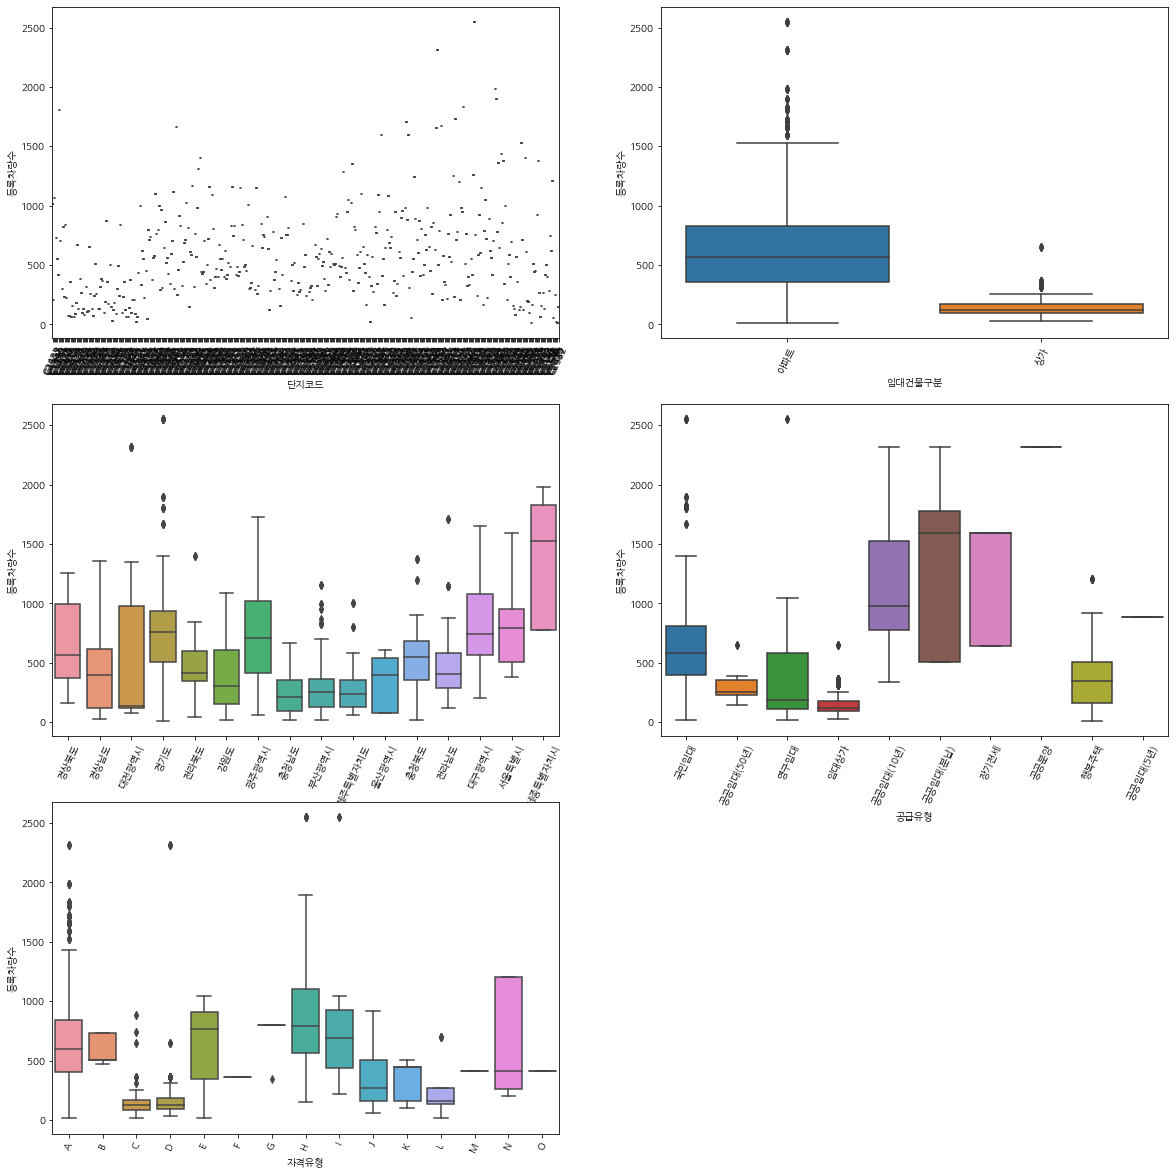

In [38]:
boxplot(train, train.columns, '등록차량수')

1. 아파트가 상가보다 더 등록 차량수가 많다. 
2. 세종특별자치시가 다른 지역보다 월등하게 등록 차량수가 많다. 그 다음으로는 수도권  
3. 공공임대(분납)의 경우 등록 차량수가 많다.  

## 3. 상관분석

In [39]:
train.corr()   

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
총세대수,1.000000,0.042271,0.098205,0.068192,0.075493,0.099606,0.213843,-0.001446,0.501488,0.316703
전용면적,0.042271,1.000000,-0.035479,-0.089201,0.490950,0.740591,-0.013111,-0.007866,0.071260,0.115453
전용면적별세대수,0.098205,-0.035479,1.000000,0.166472,-0.099252,-0.057759,-0.056680,0.047112,0.281989,0.247085
공가수,0.068192,-0.089201,0.166472,1.000000,0.030728,-0.194322,-0.093334,0.043285,0.289819,0.118121
임대보증금,0.075493,0.490950,-0.099252,0.030728,1.000000,0.557144,0.027113,0.110757,0.270697,0.311469
임대료,0.099606,0.740591,-0.057759,-0.194322,0.557144,1.000000,0.071571,0.044654,0.279785,0.416536
지하철,0.213843,-0.013111,-0.056680,-0.093334,0.027113,0.071571,1.000000,0.098380,-0.055544,-0.108592
버스,-0.001446,-0.007866,0.047112,0.043285,0.110757,0.044654,0.098380,1.000000,0.070696,0.103752
단지내주차면수,0.501488,0.071260,0.281989,0.289819,0.270697,0.279785,-0.055544,0.070696,1.000000,0.859216
등록차량수,0.316703,0.115453,0.247085,0.118121,0.311469,0.416536,-0.108592,0.103752,0.859216,1.000000


<AxesSubplot:>

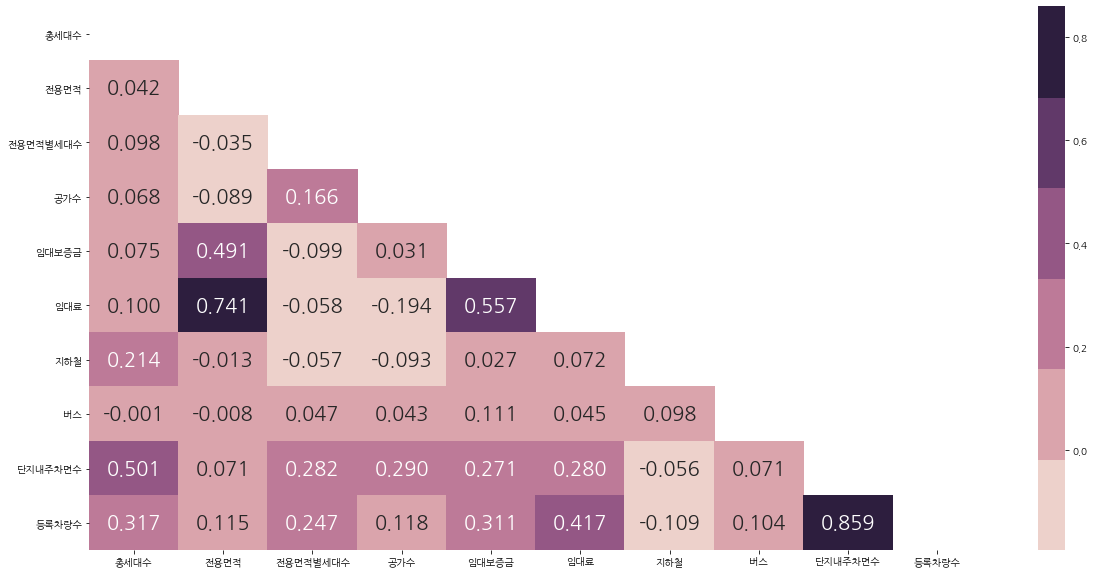

In [40]:
mask = np.zeros_like(train.corr() ,dtype=bool)
mask[np.triu_indices_from(mask)] = True   
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,fmt=".3f",annot_kws = {"size":20},cmap=sns.cubehelix_palette(),mask=mask) 

## 4. Preprocessing

In [41]:
#데이터 중복 제거 
total=pd.concat([train,test],axis=0) 
total.reset_index(drop=True, inplace=True) 
total   

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0,NaN
3970,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,NaN
3971,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,NaN
3972,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,NaN


In [42]:
total=total.drop_duplicates().reset_index(drop=True) 
total

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0,NaN
3577,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,NaN
3578,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,NaN
3579,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,NaN


In [43]:
#null처리
total.isnull().sum()   

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       418
임대료         427
지하철         189
버스            4
단지내주차면수       0
등록차량수       949
dtype: int64

In [44]:
#1.자격 유형 
total[total['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2796,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,NaN
2839,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,NaN


- 자격 유형은 단지코드, 지역, 공급유형과 연관이 있지 않을까

In [45]:
total[(total['단지코드']=='C2411') | (total['단지코드']=='C2253')]  

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2793,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,100720,0.0,2.0,840.0,NaN
2794,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,100720,0.0,2.0,840.0,NaN
2795,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,100720,0.0,2.0,840.0,NaN
2796,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,NaN
2797,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,171480,0.0,2.0,840.0,NaN
2839,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,NaN
2840,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,83020,0.0,2.0,173.0,NaN
2841,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,83020,0.0,2.0,173.0,NaN
2842,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,NaN,NaN,0.0,2.0,173.0,NaN
2843,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,NaN,NaN,0.0,2.0,173.0,NaN


In [46]:
total.loc[(total['자격유형'].isnull()) & (total['단지코드']=='C2411'), '자격유형']='A'
total.loc[(total['자격유형'].isnull()) & (total['단지코드']=='C2253'), '자격유형']='C'

In [47]:
total['임대료'].replace('-',np.nan,inplace=True)  
total['임대보증금'].replace('-',np.nan,inplace=True)
total['임대료']=total['임대료'].astype(np.float64)   
total['임대보증금']=total['임대보증금'].astype(np.float64) 

In [48]:
total.isnull().sum() 

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       424
임대료         433
지하철         189
버스            4
단지내주차면수       0
등록차량수       949
dtype: int64

In [49]:
# 2. 임대료, 임대보증금 
rent_null=total[total['임대료'].isnull() | total['임대보증금'].isnull()]    
rent_null

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
82,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
92,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
93,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
94,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,NaN,NaN,0.0,1.0,40.0,NaN
3573,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN
3574,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN
3575,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN


In [50]:
rent_null.임대보증금.value_counts(dropna=False)    

NaN            424
174888000.0      2
194562000.0      2
213863000.0      2
87444000.0       1
216423000.0      1
187694000.0      1
Name: 임대보증금, dtype: int64

In [51]:
rent_null[rent_null['임대보증금'].notnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
1740,C1397,370,아파트,서울특별시,장기전세,23.32,51,9.0,A,87444000.0,NaN,0.0,3.0,1590.0,1595.0
1741,C1397,370,아파트,서울특별시,장기전세,46.79,4,9.0,A,174888000.0,NaN,0.0,3.0,1590.0,1595.0
1742,C1397,370,아파트,서울특별시,장기전세,46.91,69,9.0,A,174888000.0,NaN,0.0,3.0,1590.0,1595.0
1743,C1397,370,아파트,서울특별시,장기전세,51.96,24,9.0,A,194562000.0,NaN,0.0,3.0,1590.0,1595.0
1744,C1397,370,아파트,서울특별시,장기전세,51.99,80,9.0,A,194562000.0,NaN,0.0,3.0,1590.0,1595.0
1745,C1397,370,아파트,서울특별시,장기전세,59.93,142,9.0,A,216423000.0,NaN,0.0,3.0,1590.0,1595.0
1796,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000.0,NaN,0.0,3.0,673.0,645.0
1797,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000.0,NaN,0.0,3.0,673.0,645.0
1798,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000.0,NaN,0.0,3.0,673.0,645.0


- 장기전세는 임대료 없으므로 0으로 대체

In [52]:
rent_null.loc[rent_null['임대보증금'].notnull(), '임대료']=0  

In [53]:
rent_null.임대료.value_counts(dropna=False) 

NaN    424
0.0      9
Name: 임대료, dtype: int64

In [54]:
total.loc[total['공급유형']=='장기전세', '임대료']=0
total.loc[total['공급유형']=='장기전세', '임대료']

1740    0.0
1741    0.0
1742    0.0
1743    0.0
1744    0.0
1745    0.0
1796    0.0
1797    0.0
1798    0.0
Name: 임대료, dtype: float64

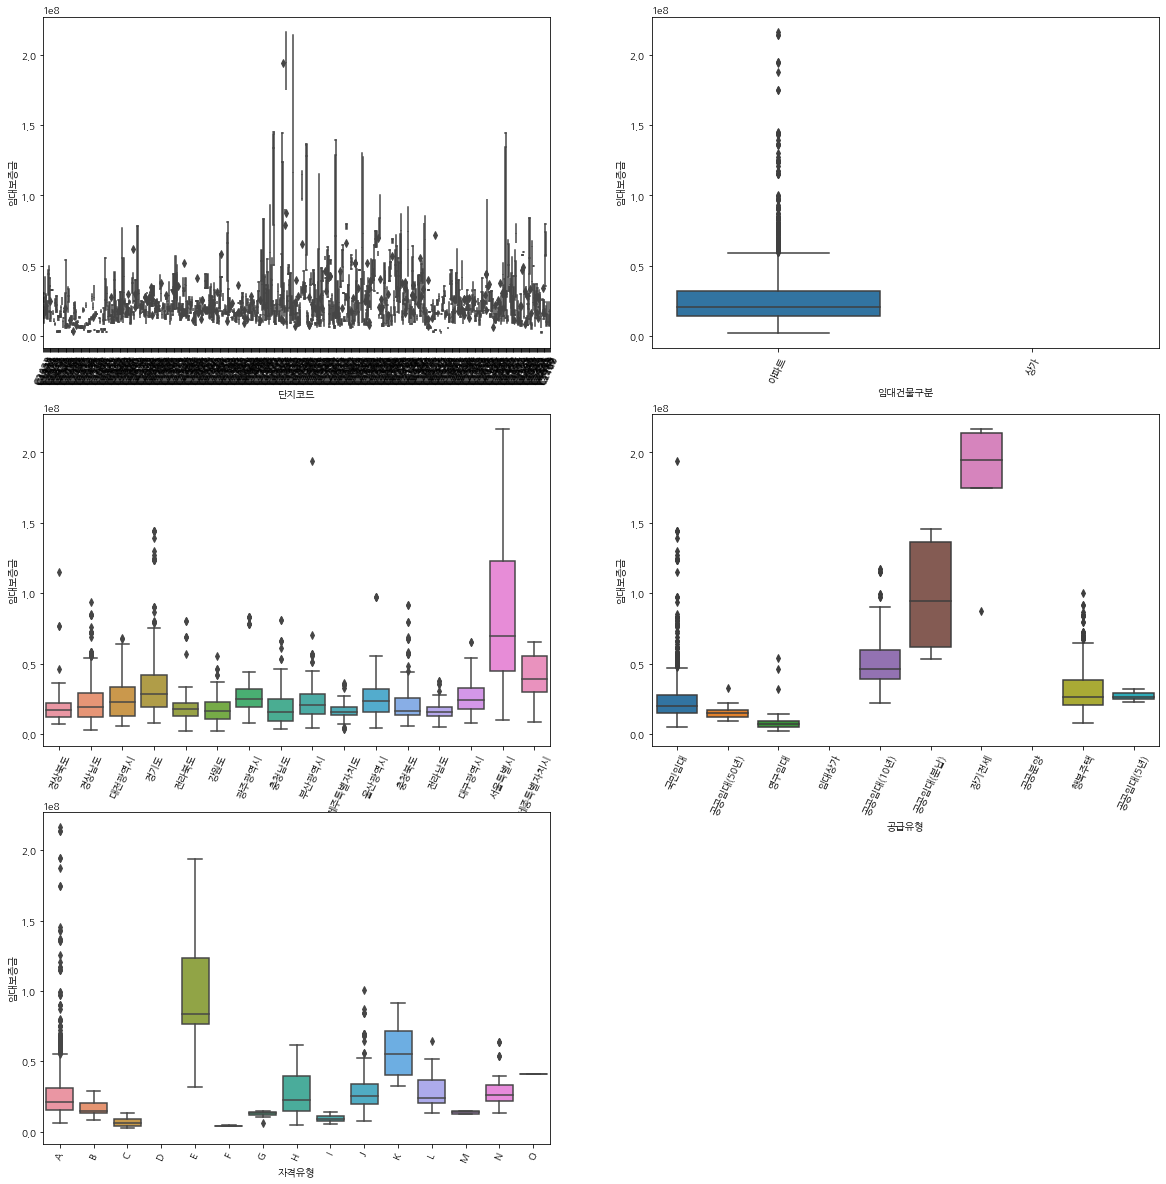

In [55]:
boxplot(total, total.columns, '임대보증금')

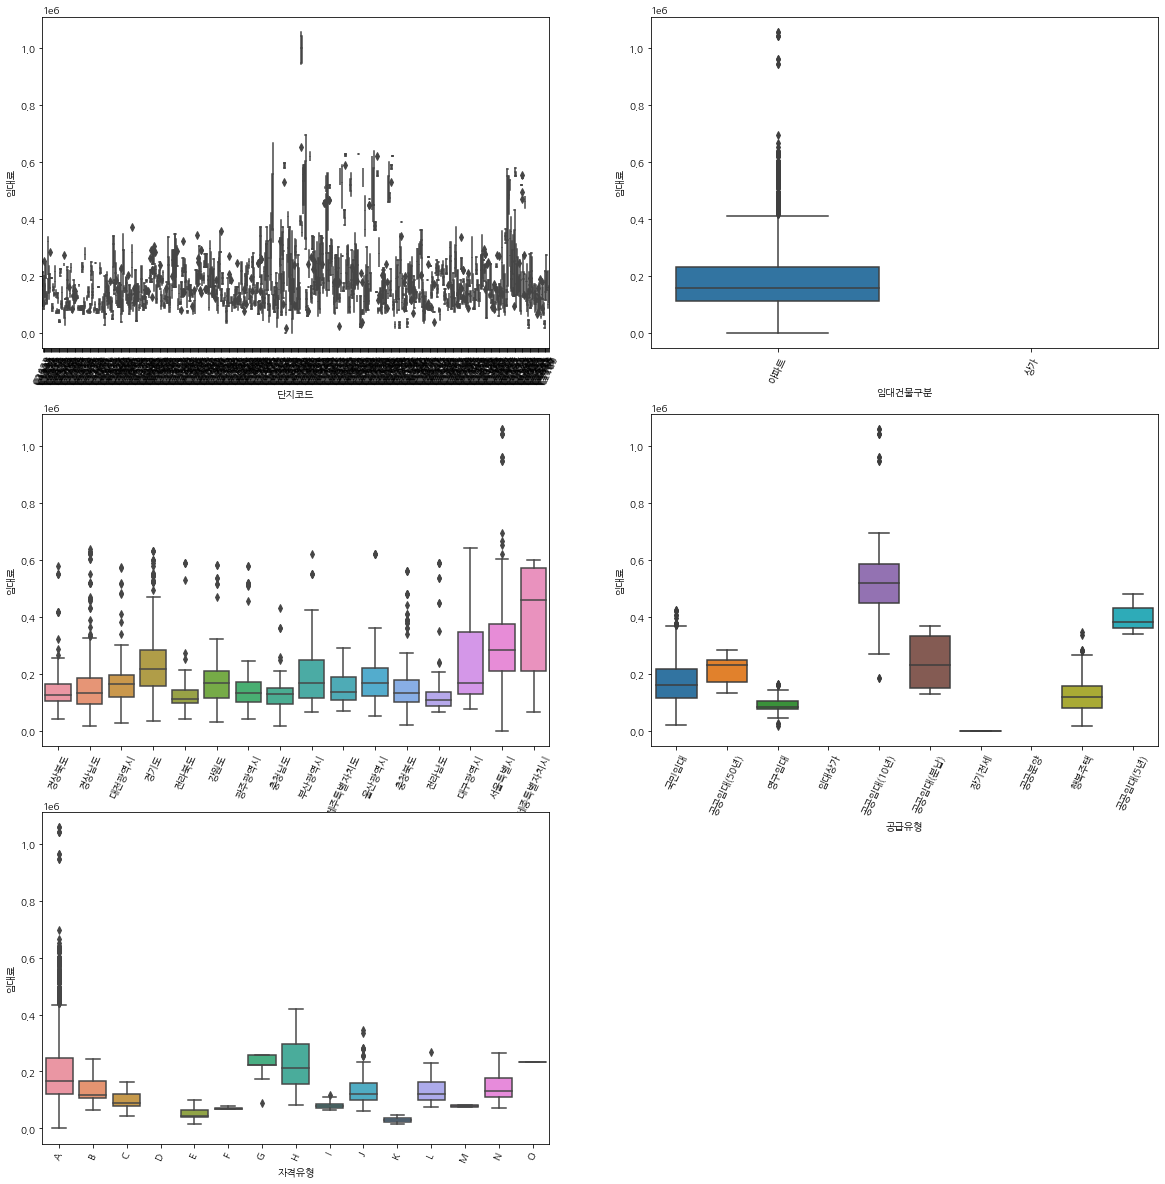

In [56]:
boxplot(total, total.columns, '임대료') 

- 공공분양, 상가의 경우 임대료와 임대 정보 X 
- 세종특별자치시, 서울특별시의 경우 임대료, 임대보증금 높다. 
- 장기 전세, 공공임대(분납)의 경우 임대보증금이 높다.  
- 공공임대(10년)의 경우 임대료가 높다. 
- 자격유형 D의 경우 임대보증금과 임대료 정보 X
- 자격유형 E의 주민들은 임대보증금이 높게, 임대료가 낮게 측정

In [57]:
total[total['자격유형']=='E'] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
146,C1616,1507,아파트,대전광역시,영구임대,40.32,450,1.0,E,54040000.0,28140.0,NaN,2.0,407.0,98.0
547,C2401,213,아파트,강원도,국민임대,46.90,104,21.0,E,55413000.0,28850.0,0.0,3.0,164.0,19.0
670,C2097,998,아파트,경상북도,국민임대,46.70,115,29.0,E,76506000.0,39840.0,0.0,2.0,1240.0,995.0
671,C2097,998,아파트,경상북도,국민임대,46.75,244,29.0,E,76506000.0,39840.0,0.0,2.0,1240.0,995.0
764,C2458,853,아파트,광주광역시,국민임대,46.59,61,28.0,E,78080000.0,40670.0,0.0,3.0,853.0,910.0
765,C2458,853,아파트,광주광역시,국민임대,46.90,432,28.0,E,78080000.0,40670.0,0.0,3.0,853.0,910.0
766,C2458,853,아파트,광주광역시,국민임대,46.90,2,28.0,E,78080000.0,40670.0,0.0,3.0,853.0,910.0
767,C2458,853,아파트,광주광역시,국민임대,46.90,56,28.0,E,78080000.0,40670.0,0.0,3.0,853.0,910.0
1339,C2394,277,아파트,충청남도,국민임대,46.90,45,20.0,E,65856600.0,34290.0,0.0,2.0,222.0,254.0
1340,C2394,277,아파트,충청남도,국민임대,46.90,15,20.0,E,65856600.0,34290.0,0.0,2.0,222.0,254.0


In [58]:
total['전용면적'].describe()   

count    3581.000000
mean       45.733574
std        33.764236
min         9.960000
25%        36.470000
50%        46.190000
75%        51.750000
max       583.400000
Name: 전용면적, dtype: float64

In [59]:
total[total['자격유형']=='D']['공급유형'].value_counts()  

임대상가    397
공공분양      7
영구임대      2
Name: 공급유형, dtype: int64

In [60]:
total[(total['자격유형']=='D')]['임대건물구분'].value_counts()  

상가     397
아파트      9
Name: 임대건물구분, dtype: int64

In [61]:
total[(total['자격유형']=='D') & (total['임대건물구분']=='아파트')] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2023,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2024,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2025,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2026,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2027,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2028,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2029,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2707,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,NaN
2709,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0,NaN


1. 자격 유형 D인 사람들 대부분 상가 건물, 아파트여도 2개를 제외하고 모두 공공분양

In [62]:
total[(total['지역']=='대전광역시') & (total['공급유형']=='영구임대')]  

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
130,C2621,1396,아파트,대전광역시,영구임대,26.37,890,26.0,C,5787000.0,79980.0,1.0,4.0,277.0,133.0
131,C2621,1396,아파트,대전광역시,영구임대,26.37,141,26.0,C,5787000.0,79980.0,1.0,4.0,277.0,133.0
132,C2621,1396,아파트,대전광역시,영구임대,26.37,20,26.0,C,5787000.0,79980.0,1.0,4.0,277.0,133.0
133,C2621,1396,아파트,대전광역시,영구임대,31.32,298,26.0,C,6873000.0,94990.0,1.0,4.0,277.0,133.0
134,C2621,1396,아파트,대전광역시,영구임대,52.74,9,26.0,C,11574000.0,159960.0,1.0,4.0,277.0,133.0
135,C2621,1396,아파트,대전광역시,영구임대,52.74,4,26.0,C,11574000.0,159960.0,1.0,4.0,277.0,133.0
144,C1616,1507,아파트,대전광역시,영구임대,26.37,588,1.0,C,5787000.0,79980.0,NaN,2.0,407.0,98.0
145,C1616,1507,아파트,대전광역시,영구임대,31.32,450,1.0,C,6873000.0,94990.0,NaN,2.0,407.0,98.0
146,C1616,1507,아파트,대전광역시,영구임대,40.32,450,1.0,E,54040000.0,28140.0,NaN,2.0,407.0,98.0
160,C1704,639,아파트,대전광역시,영구임대,39.30,204,34.0,C,8625000.0,119190.0,NaN,7.0,162.0,131.0


In [63]:
total[(total['지역']=='대전광역시') & (total['공급유형']=='영구임대') & (total['전용면적']==52.74)] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
134,C2621,1396,아파트,대전광역시,영구임대,52.74,9,26.0,C,11574000.0,159960.0,1.0,4.0,277.0,133.0
135,C2621,1396,아파트,대전광역시,영구임대,52.74,4,26.0,C,11574000.0,159960.0,1.0,4.0,277.0,133.0
205,C1859,2424,아파트,대전광역시,영구임대,52.74,26,1.0,C,11574000.0,159960.0,1.0,4.0,487.0,116.0
2709,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0,NaN


In [64]:
#자격유형 C, D인 주민들 사이에 임대료, 임대보증금의 차이가 크게 나지 않을 것이라는 가정하에 전용면적에 따라 대체 
total.loc[2707,'임대보증금']=5787000.0 
total.loc[2707,'임대료']=79980.0 
total.loc[2709,'임대보증금']=11574000.0 
total.loc[2709,'임대료']=159960.0

- LH 청약센터 자료 활용

In [65]:
#공공분양의 경우 임대료 X  
total[(total['지역']=='대전광역시') & (total['공급유형']=='공공분양')] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2023,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2024,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2025,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2026,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2027,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2028,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2029,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


In [66]:
total.loc[(total['지역']=='대전광역시') & (total['공급유형']=='공공분양'), ['임대료','임대보증금']]=0    
total[(total['지역']=='대전광역시') & (total['공급유형']=='공공분양')]  

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2023,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0
2024,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0
2025,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0
2026,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0
2027,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0
2028,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0
2029,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0


In [67]:
total['총분양가']=0.0   
total[(total['지역']=='대전광역시') & (total['공급유형']=='공공분양')]           

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
2023,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,0.0
2024,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,0.0
2025,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,0.0
2026,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,0.0
2027,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,0.0
2028,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,0.0
2029,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,0.0


1. 대전광역시, 공공분양 : 대전광역시 서구 관저동 공공주택지구내 블록

In [68]:
total.loc[(total['지역']=='대전광역시') & (total['공급유형']=='공공분양'), '총분양가']=[221640000, 217200000, 221640000, 251220000, 251220000, 251260000, 251320000]

In [69]:
total[(total['지역']=='대전광역시') & (total['공급유형']=='공공분양')]     

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
2023,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,221640000.0
2024,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,217200000.0
2025,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,221640000.0
2026,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,251220000.0
2027,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,251220000.0
2028,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,251260000.0
2029,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,0.0,0.0,NaN,6.0,1636.0,2315.0,251320000.0


In [70]:
total[(total['임대건물구분']=='아파트') & (total['임대보증금'].isnull())].sort_values(by='지역', ascending=False)   

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
2238,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0.0
2239,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0.0
2240,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0.0
2241,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0.0
2242,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0,0.0
2588,C2186,924,아파트,대구광역시,국민임대,37.43,220,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0.0
2587,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0.0
2586,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0,0.0
3573,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN,0.0
3574,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN,0.0


2. 부산광역시 - 국민임대 : 부산광역시 기장군 정관읍 모전로 41 (모전리 681번지) 부산정관 7단지 국민임대주택 

In [71]:
total.loc[(total['임대건물구분']=='아파트') & (total['임대보증금'].isnull()) & (total['지역'] == '부산광역시'), '임대보증금'] = [7000000,7000000,7600000,14800000,23100000]  

In [72]:
total.loc[(total['임대건물구분']=='아파트') & (total['임대료'].isnull()) & (total['지역'] == '부산광역시'), '임대료']= [135000, 135000, 142000, 198000, 259000]    

3. 대구광역시 - 국민임대 : 대구연경A2블록 국민임대주택

In [73]:
total.loc[(total['임대건물구분']=='아파트') & (total['임대보증금'].isnull()) & (total['지역'] == '대구광역시'), '임대보증금'] = [10847000, 10847000, 17338000] 
total.loc[(total['임대건물구분']=='아파트') & (total['임대료'].isnull()) & (total['지역'] == '대구광역시'), '임대료'] = [138600, 138600, 197500]  

In [74]:
total[(total['임대건물구분']=='아파트') & (total['임대보증금'].isnull())].sort_values(by='지역', ascending=False)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
3573,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN,0.0
3574,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN,0.0
3575,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN,0.0
3576,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN,0.0
2369,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0.0
2370,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0.0
2371,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0.0
2372,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0,0.0
3564,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,NaN,NaN,0.0,1.0,40.0,NaN,0.0
3565,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,NaN,NaN,0.0,1.0,40.0,NaN,0.0


4. 경상남도 - 행복주택 : 정보 명확하지 않아서 경상남도, 행복주택인 경우에 따라 대치 
    - 자격 유형이 L인 경우와 J인 경우 비슷
    - 자격 유형과 전용 면적에 따라 처리

In [75]:
total[(total['지역']=='경상남도') & (total['임대건물구분']=='아파트') & (total['공급유형']=='행복주택')].sort_values('전용면적')              

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
2520,C2225,1206,아파트,경상남도,행복주택,16.02,120,49.0,K,33888000.0,17650.0,0.0,3.0,842.0,448.0,0.0
2521,C2225,1206,아파트,경상남도,행복주택,16.27,44,49.0,K,32758000.0,17060.0,0.0,3.0,842.0,448.0,0.0
2522,C2225,1206,아파트,경상남도,행복주택,16.29,340,49.0,K,33888000.0,17650.0,0.0,3.0,842.0,448.0,0.0
3416,C1003,480,아파트,경상남도,행복주택,16.69,128,29.0,J,12000000.0,61000.0,0.0,3.0,339.0,NaN,0.0
2494,C2245,212,아파트,경상남도,행복주택,16.71,67,22.0,K,34499000.0,17960.0,0.0,1.0,114.0,98.0,0.0
2495,C2245,212,아파트,경상남도,행복주택,16.71,5,22.0,K,33216000.0,17300.0,0.0,1.0,114.0,98.0,0.0
3573,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,NaN,NaN,0.0,1.0,467.0,NaN,0.0
3477,C2043,469,아파트,경상남도,행복주택,16.95,15,23.0,J,17560000.0,79160.0,0.0,4.0,330.0,NaN,0.0
3476,C2043,469,아파트,경상남도,행복주택,16.95,186,23.0,J,18300000.0,82500.0,0.0,4.0,330.0,NaN,0.0
3424,C2268,900,아파트,경상남도,행복주택,17.23,80,45.0,K,33446000.0,17420.0,0.0,2.0,633.0,NaN,0.0


In [76]:
pd.options.display.float_format='{:.3f}'.format  
total[(total['지역']=='경상남도') & (total['임대건물구분']=='아파트') & (total['공급유형']=='행복주택')].groupby(['자격유형','전용면적'])[['임대보증금','임대료']].mean()

임대보증금        임대료
자격유형 전용면적                          
J    16.690 12000000.000  61000.000
     16.950 17930000.000  80830.000
     26.340 19600000.000 100000.000
     26.520 18800000.000  96000.000
     26.790 27320000.000 123160.000
     26.900 27320000.000 123160.000
     36.310 25600000.000 131000.000
     36.440 25600000.000 131000.000
     36.780 37240000.000 167890.000
     36.970 37240000.000 167890.000
     44.160 30000000.000 154000.000
     44.290 30000000.000 154000.000
K    16.020 33888000.000  17650.000
     16.270 32758000.000  17060.000
     16.290 33888000.000  17650.000
     16.710 33857500.000  17630.000
     17.230 33446000.000  17420.000
     26.170 54110333.333  28180.000
     26.190 51961000.000  27060.000
     26.950 50657000.000  26380.000
     36.030 72294000.000  37650.000
     36.050 72294000.000  37650.000
     36.990 71616000.000  37300.000
     39.680 84176000.000  43830.000
     39.790 84176000.000  43830.000
L    16.940          NaN        NaN
     21.540 20460000.000 100000.000
     21.900 21220000.000 104000.000
     26.270 24660000.000 121000.000
     26.370 24660000.000 121000.000
     26.850          NaN        NaN
     36.770          NaN        NaN
     36.780 34140000.000 167000.000
     36.890 34140000.000 167000.000
     36.940 28200000.000 145930.000

In [77]:
total.loc[(total['지역']=='경상남도') & (total['공급유형']=='행복주택') & (total['임대보증금'].isnull()) & (total['전용면적']==16.94) , '임대보증금']=14965000.0 
total.loc[(total['지역']=='경상남도') & (total['공급유형']=='행복주택') & (total['임대료'].isnull()) & (total['전용면적']==16.94) , '임대료']=70915.0 

In [78]:
total.loc[(total['지역']=='경상남도') & (total['공급유형']=='행복주택') & (total['임대보증금'].isnull()) & (total['전용면적']==36.770) , '임대보증금']=34140000.000
total.loc[(total['지역']=='경상남도') & (total['공급유형']=='행복주택') & (total['임대료'].isnull()) & (total['전용면적']==36.770) , '임대료']=167000.000  

In [79]:
total.loc[(total['지역']=='경상남도') & (total['공급유형']=='행복주택') & (total['임대보증금'].isnull()) & (total['전용면적']==26.850) , '임대보증금'] = 25000000.000 
total.loc[(total['지역']=='경상남도') & (total['공급유형']=='행복주택') & (total['임대료'].isnull()) & (total['전용면적']==26.850) , '임대료'] = 130000.000 

In [80]:
#여기서부터 다시 
total[(total['지역']=='강원도') & (total['공급유형']=='행복주택')] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
2369,C1786,480,아파트,강원도,행복주택,16.910,156,25.000,K,NaN,NaN,0.000,3.000,338.000,345.000,0.000
2370,C1786,480,아파트,강원도,행복주택,26.900,136,25.000,K,NaN,NaN,0.000,3.000,338.000,345.000,0.000
2371,C1786,480,아파트,강원도,행복주택,26.900,72,25.000,K,NaN,NaN,0.000,3.000,338.000,345.000,0.000
2372,C1786,480,아파트,강원도,행복주택,26.900,24,25.000,K,NaN,NaN,0.000,3.000,338.000,345.000,0.000
2373,C1786,480,아파트,강원도,행복주택,36.910,92,25.000,J,30560000.000,145160.000,0.000,3.000,338.000,345.000,0.000


5. 강원도 - 행복주택 : 춘천거두2 행복주택
6. 강원도 - 영구임대 : 화천신읍 공공실버주택 

In [81]:
total.loc[(total['지역']=='강원도') & (total['공급유형']=='행복주택') & total['임대보증금'].isnull() , '임대보증금']= [13181000, 19700000, 19150000, 21679000]  

In [82]:
total.loc[(total['지역']=='강원도') & (total['공급유형']=='행복주택') & total['임대료'].isnull() , '임대료'] = [65500, 96000, 94000, 105000]  

In [83]:
total.loc[(total['지역']=='강원도') & (total['공급유형']=='영구임대') & total['임대보증금'].isnull(), '임대보증금']=[2129000, 2902000]
total.loc[(total['지역']=='강원도') & (total['공급유형']=='영구임대') & total['임대료'].isnull(), '임대료']=[42350, 57730]

#### 2. 상가 null 채우기 

In [84]:
total['지역'].value_counts()
total[total['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
81,C1925,601,상가,강원도,임대상가,32.100,1,9.000,D,NaN,NaN,0.000,4.000,117.000,75.000,0.000
82,C1925,601,상가,강원도,임대상가,72.160,1,9.000,D,NaN,NaN,0.000,4.000,117.000,75.000,0.000
92,C1874,619,상가,충청남도,임대상가,12.620,1,2.000,D,NaN,NaN,NaN,2.000,97.000,62.000,0.000
93,C1874,619,상가,충청남도,임대상가,17.400,1,2.000,D,NaN,NaN,NaN,2.000,97.000,62.000,0.000
94,C1874,619,상가,충청남도,임대상가,22.890,1,2.000,D,NaN,NaN,NaN,2.000,97.000,62.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,C1729,627,상가,강원도,임대상가,32.460,1,0.000,D,NaN,NaN,0.000,5.000,131.000,NaN,0.000
2894,C1729,627,상가,강원도,임대상가,34.860,1,0.000,D,NaN,NaN,0.000,5.000,131.000,NaN,0.000
2895,C1729,627,상가,강원도,임대상가,35.760,1,0.000,D,NaN,NaN,0.000,5.000,131.000,NaN,0.000
2896,C1729,627,상가,강원도,임대상가,50.080,1,0.000,D,NaN,NaN,0.000,5.000,131.000,NaN,0.000


In [85]:
#1. 부산광역시 상가 
total[(total['임대보증금'].isnull()) & (total['지역']=='부산광역시')].sort_values(by='전용면적') 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
271,C2135,1116,상가,부산광역시,임대상가,14.100,1,10.000,D,NaN,NaN,1.000,3.000,262.000,127.000,0.000
287,C2034,1486,상가,부산광역시,임대상가,14.100,1,2.000,D,NaN,NaN,1.000,3.000,405.000,132.000,0.000
376,C2132,2428,상가,부산광역시,임대상가,15.000,1,1.000,D,NaN,NaN,0.000,1.000,756.000,359.000,0.000
2739,C2676,2572,상가,부산광역시,임대상가,15.000,1,25.000,D,NaN,NaN,0.000,2.000,418.000,NaN,0.000
340,C2597,1005,상가,부산광역시,임대상가,15.000,1,25.000,D,NaN,NaN,0.000,2.000,166.000,94.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,C2132,2428,상가,부산광역시,임대상가,407.970,1,1.000,D,NaN,NaN,0.000,1.000,756.000,359.000,0.000
369,C2310,1988,상가,부산광역시,임대상가,583.400,1,1.000,D,NaN,NaN,0.000,2.000,217.000,189.000,0.000
402,C2132,2428,상가,부산광역시,임대상가,583.400,1,1.000,D,NaN,NaN,0.000,1.000,756.000,359.000,0.000
336,C2289,1527,상가,부산광역시,임대상가,583.400,1,2.000,D,NaN,NaN,0.000,3.000,240.000,364.000,0.000


In [86]:
total[(total['임대보증금'].isnull()) & (total['지역']=='부산광역시')].groupby('단지코드')['총세대수'].value_counts()   

단지코드   총세대수
C1109  1957    15
C1439  1755    16
C2034  1486    15
C2132  2428    27
C2135  1116    13
C2289  1527    12
C2310  1988    12
C2597  1005    15
C2676  2572    27
Name: 총세대수, dtype: int64

In [87]:
total[total['단지코드']=='C1109']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
302,C1109,1957,아파트,부산광역시,영구임대,26.370,1490,1.000,C,5787000.000,79980.000,1.000,2.000,351.000,313.000,0.000
303,C1109,1957,아파트,부산광역시,영구임대,31.320,447,1.000,C,6873000.000,94990.000,1.000,2.000,351.000,313.000,0.000
304,C1109,1957,상가,부산광역시,임대상가,30.000,1,1.000,D,NaN,NaN,1.000,2.000,351.000,313.000,0.000
305,C1109,1957,상가,부산광역시,임대상가,21.850,1,1.000,D,NaN,NaN,1.000,2.000,351.000,313.000,0.000
306,C1109,1957,상가,부산광역시,임대상가,21.940,1,1.000,D,NaN,NaN,1.000,2.000,351.000,313.000,0.000
307,C1109,1957,상가,부산광역시,임대상가,21.980,1,1.000,D,NaN,NaN,1.000,2.000,351.000,313.000,0.000
308,C1109,1957,상가,부산광역시,임대상가,22.240,1,1.000,D,NaN,NaN,1.000,2.000,351.000,313.000,0.000
309,C1109,1957,상가,부산광역시,임대상가,23.350,1,1.000,D,NaN,NaN,1.000,2.000,351.000,313.000,0.000
310,C1109,1957,상가,부산광역시,임대상가,25.980,1,1.000,D,NaN,NaN,1.000,2.000,351.000,313.000,0.000
311,C1109,1957,상가,부산광역시,임대상가,26.530,1,1.000,D,NaN,NaN,1.000,2.000,351.000,313.000,0.000


- 부산금곡4
1. 21.98 -> 14000000, 189900
2. 28.38 -> 4992000 208000 
3. 21.85 -> 13350000, 181100
             

#### 3. 버스 null 채우기

In [88]:
total.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       397
임대료         397
지하철         189
버스            4
단지내주차면수       0
등록차량수       949
총분양가          0
dtype: int64

In [89]:
total[total['버스'].isnull()] 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
2007,C1649,575,아파트,경상남도,공공임대(10년),74.970,80,15.000,A,46000000.000,456000.000,NaN,NaN,1066.000,855.000,0.000
2008,C1649,575,아파트,경상남도,공공임대(10년),84.950,124,15.000,A,57000000.000,462000.000,NaN,NaN,1066.000,855.000,0.000
2009,C1649,575,아파트,경상남도,공공임대(10년),84.960,289,15.000,A,57000000.000,462000.000,NaN,NaN,1066.000,855.000,0.000
2010,C1649,575,아파트,경상남도,공공임대(10년),84.980,82,15.000,A,57000000.000,462000.000,NaN,NaN,1066.000,855.000,0.000


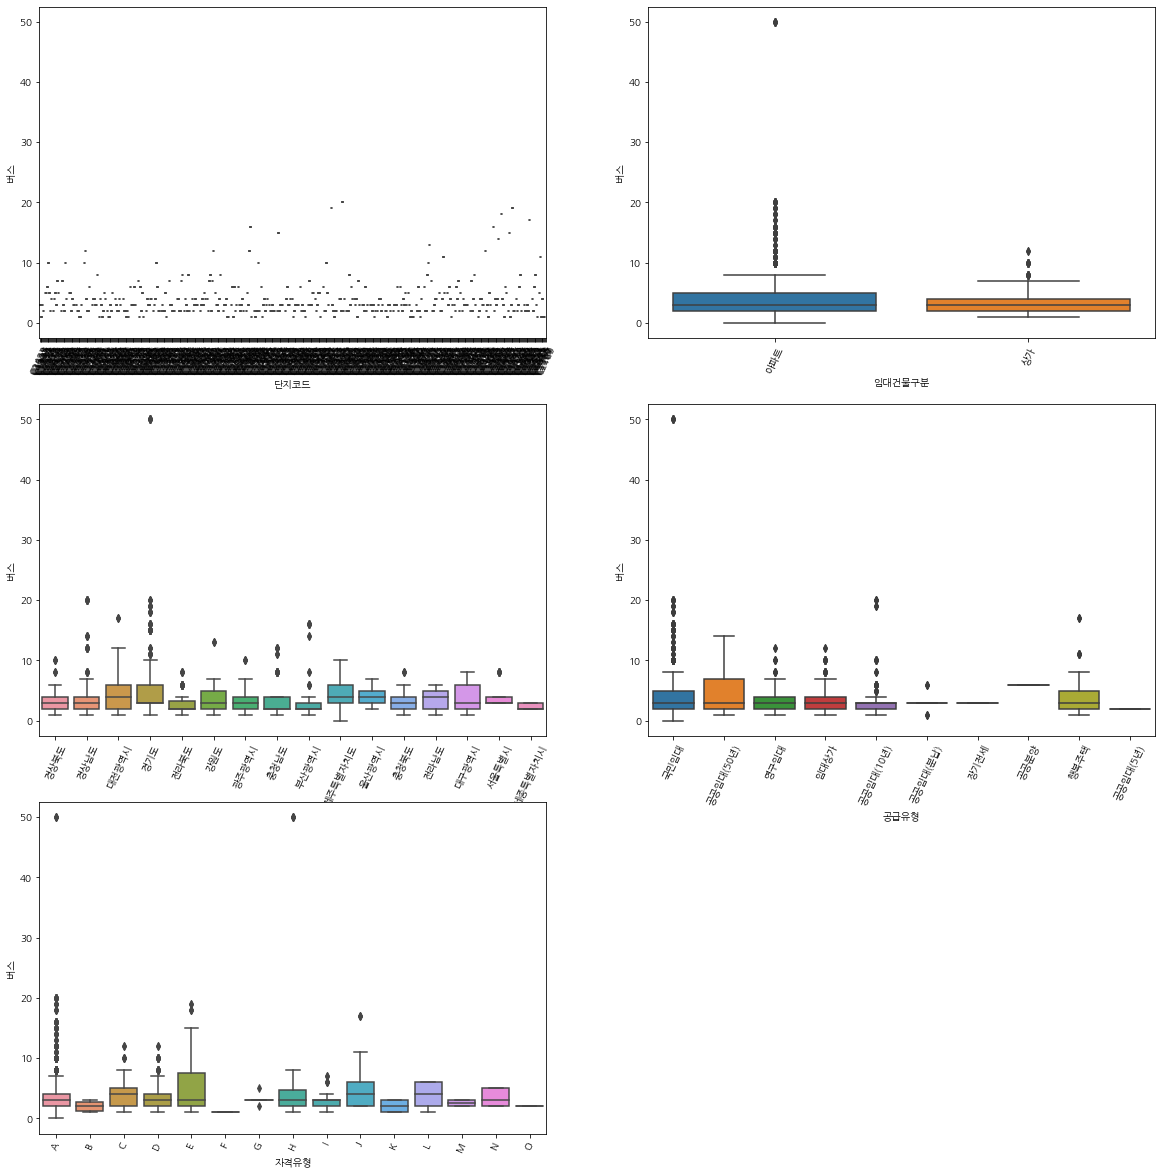

In [90]:
boxplot(total, total.columns, '버스') #버스 이상치 존재 50

In [91]:
total[total['버스']==50]  

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
2948,C1852,898,아파트,경기도,국민임대,39.590,219,6.000,H,23720000.000,197230.000,0.000,50.000,785.000,NaN,0.000
2949,C1852,898,아파트,경기도,국민임대,39.720,56,6.000,A,23720000.000,197230.000,0.000,50.000,785.000,NaN,0.000
2950,C1852,898,아파트,경기도,국민임대,39.720,44,6.000,A,23720000.000,197230.000,0.000,50.000,785.000,NaN,0.000
2951,C1852,898,아파트,경기도,국민임대,46.900,46,6.000,A,37454000.000,259660.000,0.000,50.000,785.000,NaN,0.000
2952,C1852,898,아파트,경기도,국민임대,46.900,22,6.000,A,37454000.000,259660.000,0.000,50.000,785.000,NaN,0.000
2953,C1852,898,아파트,경기도,국민임대,46.900,225,6.000,H,37454000.000,259660.000,0.000,50.000,785.000,NaN,0.000
2954,C1852,898,아파트,경기도,국민임대,51.930,136,6.000,H,45193000.000,308350.000,0.000,50.000,785.000,NaN,0.000
2955,C1852,898,아파트,경기도,국민임대,51.930,44,6.000,H,45193000.000,308350.000,0.000,50.000,785.000,NaN,0.000
2956,C1852,898,아파트,경기도,국민임대,59.610,106,6.000,H,61674000.000,370790.000,0.000,50.000,785.000,NaN,0.000


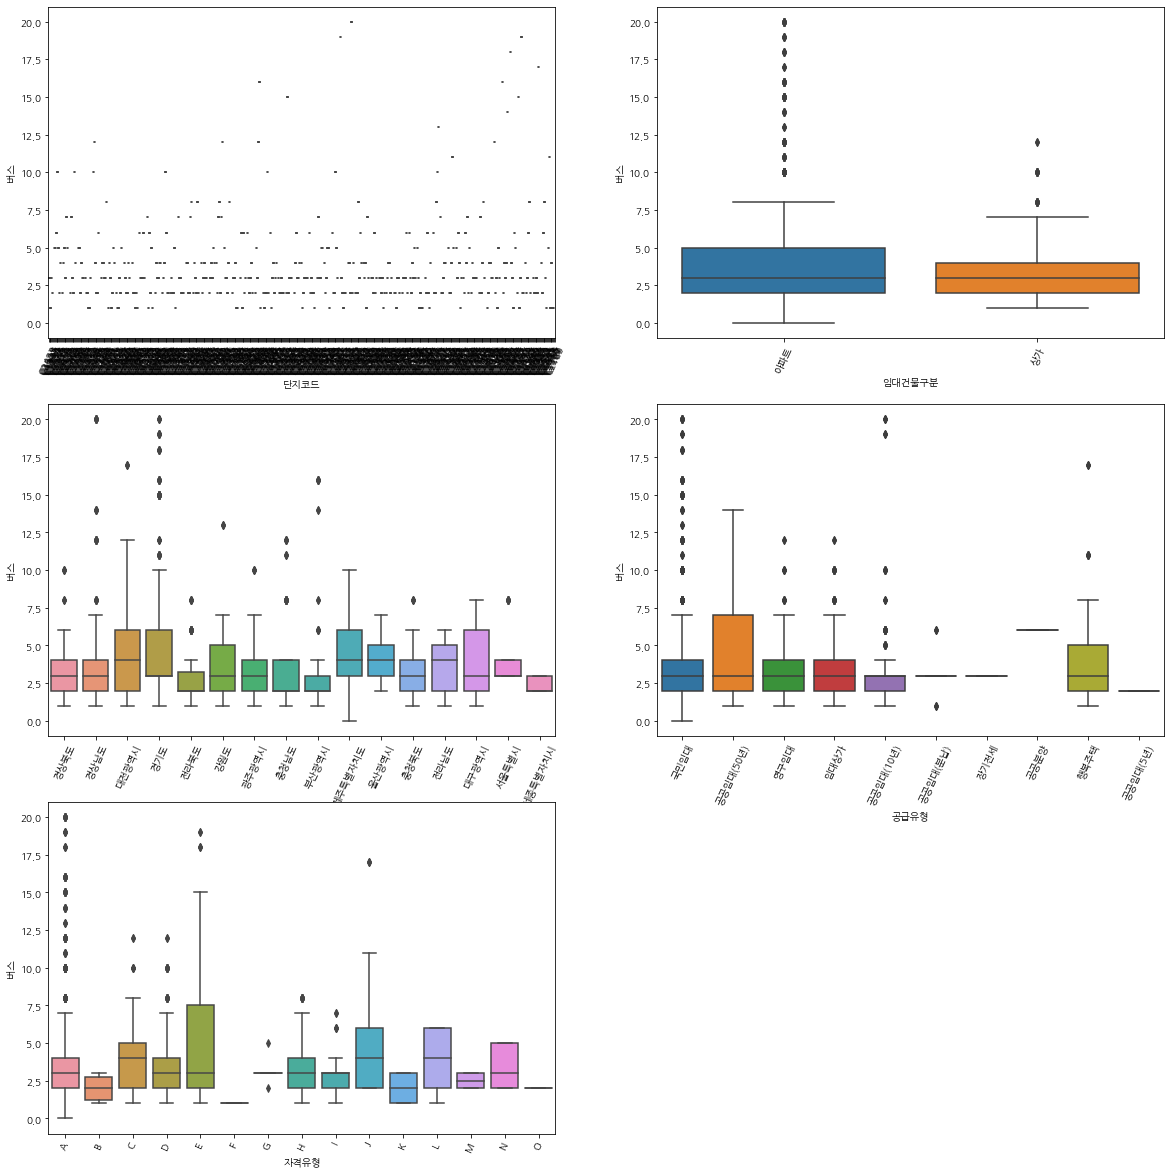

In [92]:
boxplot(total, total.columns, total[total['버스']<50]['버스']) #버스 이상치 삭제 

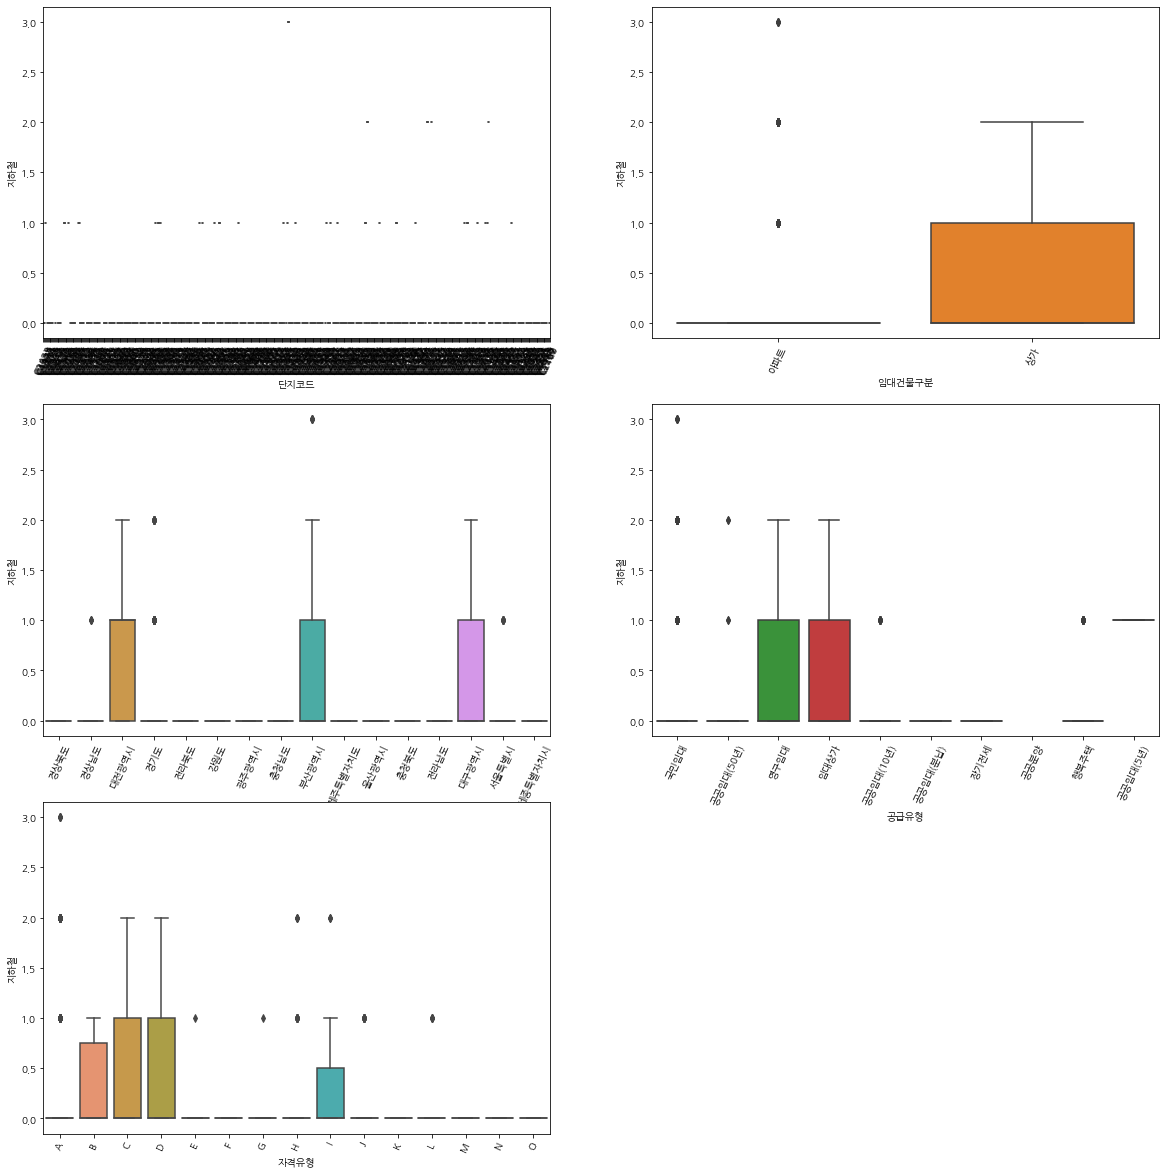

In [93]:
boxplot(total, total.columns, '지하철') 

In [94]:
total[(total['지역']=='경상남도') & (total['공급유형']=='공공임대(10년)')].sort_values(by=['임대보증금','등록차량수']) 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
1867,C1788,376,아파트,경상남도,공공임대(10년),51.590,116,28.000,A,29000000.000,340000.000,0.000,3.000,380.000,412.000,0.000
2329,C1284,528,아파트,경상남도,공공임대(10년),59.720,59,0.000,A,32896000.000,185040.000,0.000,5.000,543.000,780.000,0.000
2330,C1284,528,아파트,경상남도,공공임대(10년),59.920,469,0.000,A,32896000.000,185040.000,0.000,5.000,543.000,780.000,0.000
1868,C1788,376,아파트,경상남도,공공임대(10년),59.970,260,28.000,A,36000000.000,390000.000,0.000,3.000,380.000,412.000,0.000
1916,C2405,600,아파트,경상남도,공공임대(10년),75.840,48,22.000,A,36019000.000,603480.000,0.000,8.000,728.000,1240.000,0.000
1917,C2405,600,아파트,경상남도,공공임대(10년),75.990,54,22.000,A,36113000.000,603480.000,0.000,8.000,728.000,1240.000,0.000
2331,C2595,867,아파트,경상남도,공공임대(10년),59.950,137,2.000,A,38000000.000,430000.000,0.000,5.000,897.000,1359.000,0.000
2332,C2595,867,아파트,경상남도,공공임대(10년),59.960,557,2.000,A,38000000.000,430000.000,0.000,5.000,897.000,1359.000,0.000
2333,C2595,867,아파트,경상남도,공공임대(10년),74.930,105,2.000,A,44000000.000,550000.000,0.000,5.000,897.000,1359.000,0.000
1918,C2405,600,아파트,경상남도,공공임대(10년),84.950,182,22.000,A,44868000.000,636400.000,0.000,8.000,728.000,1240.000,0.000


1. 버스는 임대보증금, 등록차량수와 상관성이 있으므로 그에 따라 대체 -> 3
2. 해당 row 지하철: 0으로 대체

In [95]:
total.loc[(total['지역']=='경상남도') & (total['공급유형']=='공공임대(10년)') & (total['지하철'].isnull()) , '지하철']=0
total.loc[(total['지역']=='경상남도') & (total['공급유형']=='공공임대(10년)') &(total['버스'].isnull()), '버스'] = 3

In [96]:
total.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       397
임대료         397
지하철         185
버스            0
단지내주차면수       0
등록차량수       949
총분양가          0
dtype: int64

4. 지하철 null 채우기

In [97]:
total[total['지하철'].isnull()]['지역'].value_counts() 

충청남도     108
대전광역시     77
Name: 지역, dtype: int64

- 충남, 대전 지하철 null

In [98]:
total[total['지하철'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
85,C1312,518,아파트,충청남도,국민임대,39.720,60,12.000,A,17460000.000,122210.000,NaN,3.000,527.000,359.000,0.000
86,C1312,518,아파트,충청남도,국민임대,39.980,89,12.000,A,17460000.000,122210.000,NaN,3.000,527.000,359.000,0.000
87,C1312,518,아파트,충청남도,국민임대,41.550,225,12.000,A,19954000.000,130940.000,NaN,3.000,527.000,359.000,0.000
88,C1312,518,아파트,충청남도,국민임대,46.900,143,12.000,A,28687000.000,149660.000,NaN,3.000,527.000,359.000,0.000
89,C1874,619,아파트,충청남도,영구임대,26.370,294,2.000,C,3141000.000,69900.000,NaN,2.000,97.000,62.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,C1318,312,아파트,충청남도,공공임대(50년),39.720,18,1.000,A,14515000.000,208050.000,NaN,11.000,226.000,NaN,0.000
2876,C1318,312,아파트,충청남도,공공임대(50년),49.990,159,1.000,A,18269000.000,258880.000,NaN,11.000,226.000,NaN,0.000
3453,C1327,98,아파트,대전광역시,행복주택,16.830,30,13.000,J,18800000.000,94000.000,NaN,17.000,98.000,NaN,0.000
3454,C1327,98,아파트,대전광역시,행복주택,26.510,10,13.000,J,28400000.000,142000.000,NaN,17.000,98.000,NaN,0.000


In [99]:
total['지하철'].value_counts(dropna=False)

0.000    2958
1.000     372
NaN       185
2.000      60
3.000       6
Name: 지하철, dtype: int64

In [100]:
for i in [0,1,2,3]:  
    print('지하철 개수: ',i, total[total['지하철']==i]['지역'].unique())

지하철 개수:  0 ['경상북도' '경상남도' '전라북도' '경기도' '대전광역시' '강원도' '광주광역시' '부산광역시' '제주특별자치도'
 '울산광역시' '충청북도' '전라남도' '충청남도' '대구광역시' '서울특별시' '세종특별자치시']
지하철 개수:  1 ['대전광역시' '경기도' '부산광역시' '대구광역시' '서울특별시' '경상남도']
지하철 개수:  2 ['경기도' '대구광역시' '부산광역시' '대전광역시']
지하철 개수:  3 ['부산광역시']


In [101]:
total[total['지역']=='대전광역시']['지하철'].value_counts(dropna=False)

1.000    93
NaN      77
0.000    61
2.000    19
Name: 지하철, dtype: int64

In [102]:
total[(total['지역']=='대전광역시') & (total['지하철'].isnull())]['단지코드'].value_counts()

C2258    16
C1616    16
C1350    13
C2583    10
C2100     6
C1083     5
C1704     4
C1327     3
C1424     3
C2520     1
Name: 단지코드, dtype: int64

In [103]:
total[(total['지역']=='대전광역시') & (total['지하철'].notnull())]['단지코드'].value_counts()    

C1006    19
C1859    18
C2038    16
C1177    16
C1406    14
C1171    11
C2621     9
C1189     8
C1407     8
C2314     7
C1032     6
C2430     6
C1215     6
C2298     5
C2319     4
C1693     4
C1663     4
C2276     3
C2470     3
C1155     3
C1017     3
Name: 단지코드, dtype: int64

- 지하철은 그나마 총세대수와 상관성이 있다. 

In [104]:
#모르겠다.. 그냥 최빈값 0으로 대치
total['지하철'].value_counts(dropna=False)

0.000    2958
1.000     372
NaN       185
2.000      60
3.000       6
Name: 지하철, dtype: int64

In [105]:
total['지하철']=total['지하철'].fillna(0)  
total['지하철'].value_counts(dropna=False)

0.000    3143
1.000     372
2.000      60
3.000       6
Name: 지하철, dtype: int64

In [106]:
 total.isnull().sum()  

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       397
임대료         397
지하철           0
버스            0
단지내주차면수       0
등록차량수       949
총분양가          0
dtype: int64

In [107]:
age_gender_info.reset_index()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030,0.033,0.056,0.061,0.060,0.068,0.053,0.050,0.084,...,0.083,0.064,0.048,0.030,0.029,0.011,0.006,0.002,0.000,0.000
1,경상남도,0.027,0.027,0.053,0.056,0.065,0.071,0.056,0.058,0.077,...,0.087,0.070,0.048,0.033,0.027,0.011,0.005,0.001,0.000,0.000
2,대전광역시,0.028,0.029,0.040,0.043,0.061,0.064,0.069,0.067,0.075,...,0.088,0.070,0.051,0.037,0.032,0.014,0.006,0.002,0.000,0.000
3,경기도,0.038,0.040,0.053,0.054,0.058,0.060,0.072,0.069,0.083,...,0.074,0.058,0.042,0.033,0.025,0.012,0.005,0.002,0.000,0.000
4,전라북도,0.028,0.029,0.060,0.060,0.066,0.070,0.052,0.047,0.077,...,0.077,0.068,0.051,0.036,0.035,0.013,0.007,0.002,0.000,0.000
5,강원도,0.029,0.031,0.051,0.053,0.060,0.063,0.060,0.054,0.076,...,0.088,0.070,0.048,0.033,0.034,0.013,0.008,0.002,0.000,0.000
6,광주광역시,0.032,0.035,0.050,0.050,0.065,0.067,0.067,0.064,0.080,...,0.076,0.060,0.049,0.032,0.030,0.010,0.006,0.001,0.000,0.000
7,충청남도,0.031,0.032,0.059,0.062,0.068,0.073,0.065,0.067,0.079,...,0.070,0.058,0.042,0.029,0.025,0.011,0.005,0.002,0.000,0.000
8,부산광역시,0.022,0.023,0.033,0.036,0.054,0.057,0.047,0.049,0.062,...,0.109,0.085,0.079,0.053,0.048,0.020,0.008,0.002,0.000,0.000
9,제주특별자치도,0.035,0.037,0.060,0.063,0.069,0.070,0.051,0.048,0.081,...,0.074,0.056,0.048,0.033,0.027,0.011,0.007,0.001,0.000,0.000


In [108]:
set(age_gender_info.reset_index()['지역'].unique()) - set(total['지역'].unique()) 

{'광역시 평균', '도 평균', '전체 분포 평균'}

In [109]:
total  

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수,총분양가
0,C2483,900,아파트,경상북도,국민임대,39.720,134,38.000,A,15667000.000,103680.000,0.000,3.000,1425.000,1015.000,0.000
1,C2483,900,아파트,경상북도,국민임대,39.720,15,38.000,A,15667000.000,103680.000,0.000,3.000,1425.000,1015.000,0.000
2,C2483,900,아파트,경상북도,국민임대,51.930,385,38.000,A,27304000.000,184330.000,0.000,3.000,1425.000,1015.000,0.000
3,C2483,900,아파트,경상북도,국민임대,51.930,15,38.000,A,27304000.000,184330.000,0.000,3.000,1425.000,1015.000,0.000
4,C2483,900,아파트,경상북도,국민임대,51.930,41,38.000,A,27304000.000,184330.000,0.000,3.000,1425.000,1015.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,C1267,675,아파트,경상남도,행복주택,36.770,126,38.000,L,34140000.000,167000.000,0.000,1.000,467.000,NaN,0.000
3577,C2189,382,아파트,전라북도,국민임대,29.190,96,45.000,H,6872000.000,106400.000,0.000,2.000,300.000,NaN,0.000
3578,C2189,382,아파트,전라북도,국민임대,29.190,20,45.000,H,6872000.000,106400.000,0.000,2.000,300.000,NaN,0.000
3579,C2189,382,아파트,전라북도,국민임대,39.450,202,45.000,H,13410000.000,144600.000,0.000,2.000,300.000,NaN,0.000


In [110]:
total_age=total.merge(age_gender_info.reset_index(), on='지역', how='inner') 
total_age

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2483,900,아파트,경상북도,국민임대,39.720,134,38.000,A,15667000.000,...,0.083,0.064,0.048,0.030,0.029,0.011,0.006,0.002,0.000,0.000
1,C2483,900,아파트,경상북도,국민임대,39.720,15,38.000,A,15667000.000,...,0.083,0.064,0.048,0.030,0.029,0.011,0.006,0.002,0.000,0.000
2,C2483,900,아파트,경상북도,국민임대,51.930,385,38.000,A,27304000.000,...,0.083,0.064,0.048,0.030,0.029,0.011,0.006,0.002,0.000,0.000
3,C2483,900,아파트,경상북도,국민임대,51.930,15,38.000,A,27304000.000,...,0.083,0.064,0.048,0.030,0.029,0.011,0.006,0.002,0.000,0.000
4,C2483,900,아파트,경상북도,국민임대,51.930,41,38.000,A,27304000.000,...,0.083,0.064,0.048,0.030,0.029,0.011,0.006,0.002,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,C1229,453,아파트,세종특별자치시,행복주택,38.200,68,23.000,J,30101000.000,...,0.065,0.051,0.026,0.026,0.014,0.007,0.003,0.001,0.000,0.000
3577,C1229,453,아파트,세종특별자치시,행복주택,38.200,8,23.000,J,30101000.000,...,0.065,0.051,0.026,0.026,0.014,0.007,0.003,0.001,0.000,0.000
3578,C1229,453,아파트,세종특별자치시,행복주택,38.250,3,23.000,J,30101000.000,...,0.065,0.051,0.026,0.026,0.014,0.007,0.003,0.001,0.000,0.000
3579,C1229,453,아파트,세종특별자치시,행복주택,38.280,4,23.000,J,30101000.000,...,0.065,0.051,0.026,0.026,0.014,0.007,0.003,0.001,0.000,0.000


In [111]:
total_age[total_age.columns[total_age.columns.str.contains('남자|여자')].tolist()].mean() 

10대미만(여자)   0.031
10대미만(남자)   0.032
10대(여자)     0.050
10대(남자)     0.053
20대(여자)     0.062
20대(남자)     0.065
30대(여자)     0.062
30대(남자)     0.061
40대(여자)     0.077
40대(남자)     0.072
50대(여자)     0.082
50대(남자)     0.069
60대(여자)     0.083
60대(남자)     0.066
70대(여자)     0.050
70대(남자)     0.035
80대(여자)     0.030
80대(남자)     0.013
90대(여자)     0.006
90대(남자)     0.002
100대(여자)    0.000
100대(남자)    0.000
dtype: float64

In [112]:
total_age.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철', '버스', '단지내주차면수', '등록차량수', '총분양가',
       '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'],
      dtype='object')

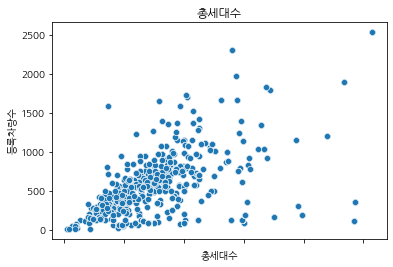

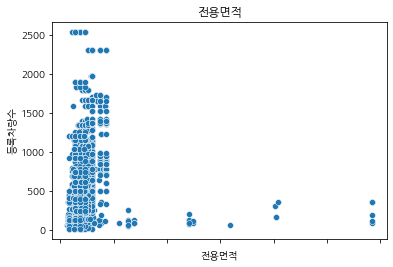

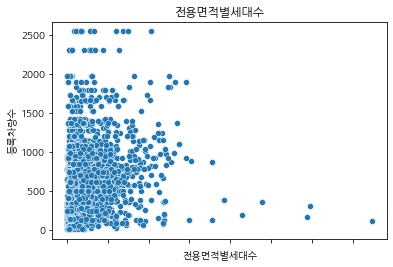

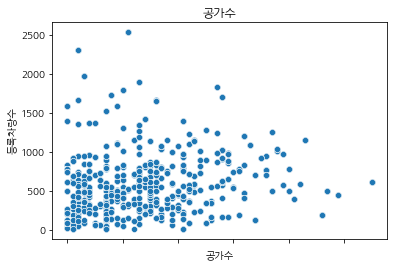

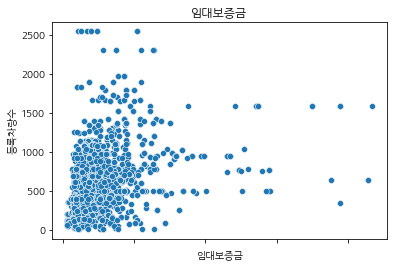

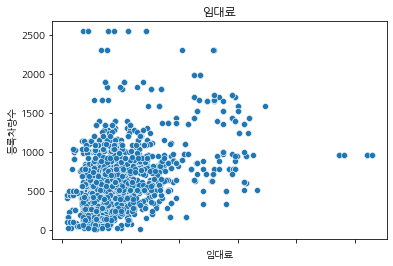

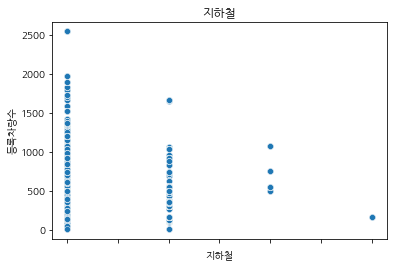

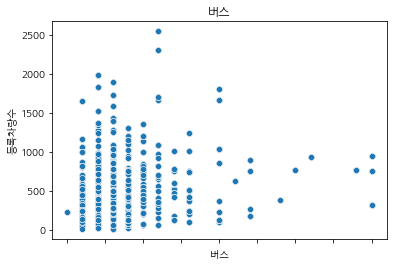

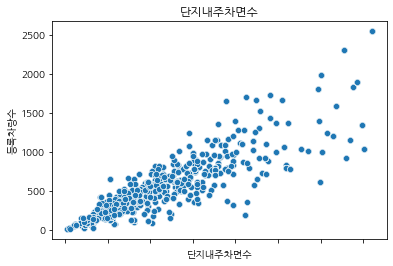

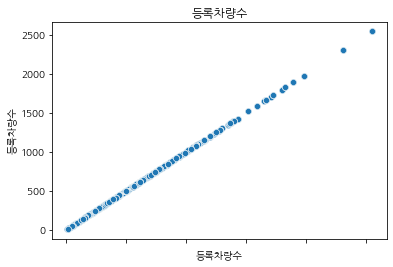

In [113]:
for column in train.dtypes[train.dtypes!='object'].index.tolist():
    chart=sns.scatterplot(x=train[column],y='등록차량수', data=train)
    plt.title(column) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
    plt.show()  

1. 총 세대수가 많을수록 당연히 등록차량수도 많다. 
2. 전용면적과 등록차량수는 상관관계가 적다. 
3. 단지내 주차 면수가 클수록 등록차량수가 많다. 


In [117]:
train_df = train
test_df = test

In [114]:
 
unique_cols = ['총세대수', '지역', '공가수', 
               '지하철',
               '버스',
               '단지내주차면수', '등록차량수'
               ]

In [118]:
train_agg = train_df.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test_df.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

 

In [119]:
df=pd.DataFrame(train_agg.groupby('지역')['등록차량수'].mean().sort_values())
for i,v in enumerate(df.index):
    train_agg.loc[train_agg['지역']==v,'지역']=i
    test_agg.loc[test_agg['지역']==v,'지역']=i


In [120]:

for i in train_df['자격유형'].unique():
    train_df['자격유형_{}'.format(i)]=0

for i in train_df['공급유형'].unique():
    train_df['공급유형_{}'.format(i)]=0

for i in train_df['단지코드'].unique():
    df=train_df[train_df['단지코드']==i]
    qual_columns=df['자격유형'].unique()
    sup_columns=df['공급유형'].unique()
    
    for z in qual_columns:
        train_df.loc[train_df['단지코드']==i,'자격유형_{}'.format(z)]=df[df['자격유형']==z]['전용면적별세대수'].sum()/df['전용면적별세대수'].sum()
    for z in sup_columns:
        train_df.loc[train_df['단지코드']==i,'공급유형_{}'.format(z)]=df[df['공급유형']==z]['전용면적별세대수'].sum()/df['전용면적별세대수'].sum()

train_df_2=train_df[['단지코드','자격유형_A', '자격유형_B', '자격유형_C', '자격유형_D',
       '자격유형_E', '자격유형_F', '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J', '자격유형_K',
       '자격유형_L', '자격유형_M', '자격유형_N', '자격유형_O', '공급유형_국민임대', '공급유형_공공임대(50년)',
       '공급유형_영구임대', '공급유형_임대상가', '공급유형_공공임대(10년)', '공급유형_공공임대(분납)',
       '공급유형_장기전세', '공급유형_공공분양', '공급유형_행복주택', '공급유형_공공임대(5년)']].drop_duplicates()
 


In [121]:

for i in test_df['자격유형'].unique():
    test_df['자격유형_{}'.format(i)]=0

for i in test_df['공급유형'].unique():
    test_df['공급유형_{}'.format(i)]=0

for i in test_df['단지코드'].unique():
    df=test_df[test_df['단지코드']==i]
    qual_columns=df['자격유형'].unique()
    sup_columns=df['공급유형'].unique()
    
    for z in qual_columns:
        test_df.loc[test_df['단지코드']==i,'자격유형_{}'.format(z)]=df[df['자격유형']==z]['전용면적별세대수'].sum()/df['전용면적별세대수'].sum()
    for z in sup_columns:
        test_df.loc[test_df['단지코드']==i,'공급유형_{}'.format(z)]=df[df['공급유형']==z]['전용면적별세대수'].sum()/df['전용면적별세대수'].sum()


In [122]:

test_df_2=test_df[['단지코드','자격유형_H', '자격유형_A', '자격유형_E', '자격유형_C', '자격유형_D',
       '자격유형_G', '자격유형_I', '자격유형_J', '자격유형_K', '자격유형_L', '자격유형_M', '자격유형_N',
       '공급유형_국민임대', '공급유형_영구임대', '공급유형_임대상가', '공급유형_공공임대(50년)',
       '공급유형_공공임대(10년)', '공급유형_공공임대(분납)', '공급유형_행복주택']].drop_duplicates()


In [123]:

train_agg=pd.merge(train_agg,train_df_2,on='단지코드')
test_agg=pd.merge(test_agg,test_df_2,on='단지코드')

train_agg=train_agg.fillna(0)
test_agg=test_agg.fillna(0)
 
train=train_agg.drop(['단지코드'],axis=1)
train=train_agg[['총세대수','지역', '공가수', '지하철', '버스',
       '단지내주차면수', '자격유형_H', '자격유형_A', '자격유형_E',
       '자격유형_C', '자격유형_D', '자격유형_G', '자격유형_I', '자격유형_J', '자격유형_K', '자격유형_L',
       '자격유형_M', '자격유형_N', '공급유형_국민임대', '공급유형_영구임대', '공급유형_임대상가',
       '공급유형_공공임대(50년)', '공급유형_공공임대(10년)', '공급유형_공공임대(분납)', '공급유형_행복주택', '등록차량수']]

test=test_agg.drop(['단지코드'],axis=1)

In [127]:

import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


 



X, y = np.array(train.iloc[:,:-1]),np.array(train.iloc[:,-1])
data_dmatrix = xgb.DMatrix(data=X,label=y)



 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

xg_reg = xgb.XGBRegressor(objective ='reg:linear',eval_metric='mae', colsample_bytree = 1, learning_rate = 0.5, max_depth = 4, alpha = 5, n_estimators = 9)
#
xg_reg.fit(X_train,y_train)

#preds = xg_reg.predict(np.array(test))
preds = xg_reg.predict(X_test)


mae = np.sqrt(mean_absolute_error(y_test, preds))
print("MAE: %f" % (mae))


[15:55:46] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 11.063116


In [125]:

xg_reg.fit(X,y)

preds = xg_reg.predict(np.array(test))

sub_df=test_agg[['단지코드']]
sub_df['Y']=preds
sub_df.columns=['code','num']
sub_df.to_csv('../result/submission.csv',index=False)





[15:40:17] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [126]:

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

xg_reg = xgb.XGBRegressor(objective ='reg:linear',eval_metric='mae', colsample_bytree = 1, learning_rate = 0.4, max_depth = 3,  n_estimators = 10)

avg=0
for i in range(20):
    scores = cross_val_score(xg_reg, X, y, cv=KFold(n_splits=5, shuffle=True), scoring='r2')

    avg+=scores.mean()
    

print(avg/20)


[15:40:30] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:30] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:30] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:30] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:30] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:30] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:30] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objecti

[15:40:31] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:31] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:31] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:31] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:31] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:31] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:31] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objecti